 **Сборный проект: исследование продаж компьютерных игр на примере нтернет-магазина «Стримчик»**

**Введение**

Мы работаем в интернет-магазине «Стримчик», который продаёт компьютерные игры по всему миру. Наша задача — выявить закономерности, определяющие успешность игр. Это поможет нам лучше спланировать рекламные кампании и сделать ставку на те продукты, которые будут пользоваться популярностью в будущем.

**Цель работы**
Мы хотим проанализировать данные о продажах игр, оценках пользователей и критиков, а также платформах и жанрах. Наша цель — выявить факторы, которые влияют на успех игр, и на основе этого подготовить рекомендации по планированию рекламных кампаний на следующий год.

**Описание данных**
У нас есть исторические данные по играм до 2016 года, которые включают:

- Name — название игры;
- Platform — платформа (например, Xbox, PlayStation);
- Year_of_Release — год выпуска игры;
- Genre — жанр игры;
- NA_sales, EU_sales, JP_sales, Other_sales — продажи игр в Северной Америке, Европе, Японии и других странах (в миллионах копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — возрастной рейтинг ESRB.

**План работы**

1. Открытие и изучение данных: 
Мы откроем файл с данными и проверим его на наличие пропусков, ошибок и выбросов.
2. Подготовка данных: 
Мы проведём обработку пропусков, исправим некорректные значения и подготовим данные для анализа.
3. Исследовательский анализ данных: 
Мы проанализируем ключевые метрики, такие как продажи в разных регионах, жанры, платформы, а также оценки критиков и пользователей.
4. Портрет пользователя для каждого региона: 
Мы составим портреты пользователей из разных регионов (Северная Америка, Европа, Япония) на основе их предпочтений по жанрам, платформам и продажам.
5. Проверка гипотез: 
Мы проверим гипотезы о влиянии различных факторов (платформы, оценки, жанры) на успешность игр.
6. Выводы и рекомендации: 
На основе результатов анализа мы подведём итоги и предложим рекомендации для планирования рекламных кампаний на следующий год.


Таким образом, мы хотим лучше понять, какие игры пользуются успехом в разных регионах и какие факторы влияют на их популярность.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial, exp
from math import sqrt
from scipy.stats import binom, norm
from scipy import stats as st
import seaborn as sns
import warnings
import numpy as np

# Игнорирование предупреждений
warnings.filterwarnings('ignore')

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*Основные выводы о данных*

Из анализа датафрейма, содержащего информацию о продажах игр, оценках критиков и пользователей, а также их рейтингах, можно сделать следующие выводы:

1.  Пропуски в данных :
   - Столбцы  Year_of_Release ,  Critic_Score ,  User_Score , и  Rating  содержат пропуски.
   - В столбце  Year_of_Release  не хватает 269 значений. Вероятно, эти пропуски возникли из-за отсутствия информации в источнике данных.
   - В столбце  Critic_Score  пропущено больше половины значений — всего 8137 непустых значений из 16715. Оценки критиков могут отсутствовать, если игра не получила официальных рецензий.
   - Столбец  User_Score  также содержит пропуски и некорректные данные (значение  'tbd' ), что означает, что рейтинг пользователей "будет определен" позже. Таких записей — 671 значений. Эти значения нужно корректно обработать.
   - В столбце  Rating  не указано около 6700 значений. Это может быть связано с тем, что не все игры проходят возрастную сертификацию или сертификация не была опубликована.

2.  Типы данных :
   -  Year_of_Release  — числовой столбец (тип float), который нужно преобразовать в тип данных  int  для удобства работы.
   -  User_Score  представлен как объект, хотя должен быть числовым значением с плавающей точкой, так как оценки варьируются от 0 до 10. 
   - Присутствует категория  'tbd'  вместо оценки, которую нужно обработать, заменив её на пропуски или другой подходящий способ.

3.  Оценки пользователей и критиков :
   - У нас есть два столбца, отражающие рейтинги игр:  Critic_Score  (оценки критиков) и  User_Score  (оценки пользователей).
   - Оценки критиков выставляются по шкале от 0 до 100, а пользовательские — по шкале от 0 до 10. Это нужно учитывать при сравнительном анализе или при преобразовании оценок к единому масштабу.

4.  Распределение продаж :
   - У нас есть данные по продажам игр в разных регионах: Северная Америка ( NA_sales ), Европа ( EU_sales ), Япония ( JP_sales ) и другие страны ( Other_sales ).
   - Продажи измеряются в миллионах копий. Для каждой игры доступны данные по продажам в этих четырёх регионах, что позволяет анализировать популярность игр по регионам и выявлять региональные различия в предпочтениях.

5.  Платформы и жанры :
   - Столбцы  Platform  и  Genre  содержат категориальные данные, что позволит провести сравнительный анализ продаж игр по платформам и жанрам.
   - Присутствуют популярные платформы, такие как  Wii ,  PS3 ,  PS4 ,  Xbox 360 ,  DS  и другие. Жанры включают  Action ,  Sports ,  Shooter ,  Racing  и т.д.

6.  Рейтинг игр :
   - Столбец  Rating  отражает возрастной рейтинг игры (например,  E ,  M ,  T ). Эта информация важна для анализа предпочтений разных возрастных категорий пользователей и для проверки влияния возрастных ограничений на продажи.

*Проблемы, требующие решения:*
-  Пропуски в данных : требуется обработать отсутствующие значения для ключевых столбцов, таких как  Year_of_Release ,  Critic_Score ,  User_Score , и  Rating .
-  Некорректные данные в столбце `User_Score` : необходимо заменить значения  'tbd'  на пропуски или на определённые значения в зависимости от стратегии обработки.
-  Преобразование типов данных : преобразовать типы данных в столбцах  Year_of_Release  и  User_Score .

Эти предварительные выводы помогут нам лучше подготовить данные для дальнейшего анализа и составить рекомендации по улучшению качества и полноты данных.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для предобработки.</font>

### Шаг 2. Подготовка данных

#### Замена названий столбцов

Заменим названия столбцов (приведем к нижнему регистру);

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработка пропусков в данных

Для начала определим, присутствуют ли в наших данных пропуски:

In [6]:
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2424

Пропуски в данных :

- Столбцы year_of_release , critic_score , user_score , и rating содержат пропуски.
- В столбце year_of_release не хватает 269 значений. Вероятно, эти пропуски возникли из-за отсутствия информации в источнике данных.
- В столбце critic_score пропущено больше половины значений — всего 8137 непустых значений из 16715. Оценки критиков могут отсутствовать, если игра не получила официальных рецензий.
- Столбец user_score также содержит пропуски и некорректные данные (значение 'tbd' ), что означает, что рейтинг пользователей "будет определен" позже. Таких записей — 2424 значений. Эти значения нужно корректно обработать.
- В столбце rating не указано около 6766 значений. Это может быть связано с тем, что не все игры проходят возрастную сертификацию или сертификация не была опубликована.

Учитывая, что дополнительные данные получить невозможно и мы можем работать только с тем, что уже есть в наборе данных, нужно подойти к обработке пропусков с учётом того, насколько важны те или иные столбцы для анализа, и можно ли заполнить их разумным образом.

  1.  `name` и `genre` (Пропуски: 2 записи) :
   -  Решение : Удалить строки с пропусками. Поскольку данные о названии игры и её жанре являются важными для любого анализа, заполнять их искусственными значениями нецелесообразно. Если мы не знаем, о какой игре идёт речь, такие записи могут быть бессмысленны для анализа.

In [8]:
# Отфильтруем строки, в которых нет пропусков в колонках 'name' и 'genre'
data = data.loc[data['name'].notna() & data['genre'].notna()]

  2.  `year_of_release` (Пропуски: около 269 записей) :
   -  Решение : Пропуски составляют всего 1,6%, поэтому удалим их из датасета.

In [9]:
# Удаление строк, где год выпуска отсутствует
data.dropna(subset=['year_of_release'], inplace=True)
print(data['year_of_release'].isna().sum())  # Проверка количества пропусков
display(data.head())  # Вывод первых 5 строк таблицы


0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


3.  `critic_score` (Пропуски: 8578, около 50% записей) :
   -  Решение : 
     - Пропуски в `critic_score` оставляем для дальнейшего анализа без изменений.

  4.  `user_score` (Пропуски и значение 'tbd') :
   - Проблема с данным столбцом — это значение `'tbd'` (To Be Determined). Оно говорит о том, что пользовательская оценка ещё не определена, и его нельзя воспринимать как числовое значение.
   
   Решение :
    
  - Заменить все значения `'tbd'` на  NaN  (пропуски).
  - Преобразовать в числовой формат.
  - Пропуски в пользовательских оценках оставить для дальнейшего анализа без изменений.

In [10]:
# Заменяем 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# Преобразуем в числовой формат
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



  5.  `rating` (Пропуски: около 5766 записей) :
   -  Решение :
Что касается возрастного рейтинга, то в наших данных присутствует только рейтинг для игр выпущенных в Северной Америке. В других странах существуют свои рейтинги, в Европе, Японии, Австралии и т.д. Но по этим рейтингам у нас нет данных. По этому пропуск в данной колонке не является ошибкой заполнения данных в датасете, а связан с тем, что игра была выпущена в другом регионе. По этому, заменив пропуск на заглушку (undefined) сможем анализировать продажи игр в зависимости от Северо-Американского рейтинга и игр, выпущенных в других регионах.

In [11]:
#  заполним пропуски в 'rating' заглушкой
data['rating'] = data['rating'].fillna('undefined')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


  Итоговые шаги:

1.  Удалены  строки с пропусками в столбцах `name` и `genre`, так как они критичны для анализа.
2.  Удалены  строки с пропусками в `year_of_release`.
3.  Пропуски в `critic_score` оставлены без изменений.
4.  Заменены  `'tbd'` в `user_score` на NaN и пропуски оставлены без изменений.
5.  Заполнены  пропуски в `rating` заглушкой.

Такая обработка данных позволит минимизировать потерю данных, а также сохранить наиболее важную информацию для дальнейшего анализа.
Убедимся, что теперь количество пропусков равно нулю:

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### Преобразвоание типов данных

Преобразуем оставшиеся данные в нужные типы.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


 Типы данных :
 
   -  Year_of_Release  — числовой столбец (тип float), который нужно преобразовать в тип данных  int  для удобства работы.
   -  User_Score был представлен как объект, хотя должен быть числовым значением с плавающей точкой, так как оценки варьируются от 0 до 10 (заменили раннее при обработке пропусков для корректного расчета медианы)
   - Присутствовала категория  'tbd'  вместо оценки, которую заменили раннее при обработке пропусков для корректного расчета медианы.
   
   
   Осталось обработать year_of_release - переведем год в целочисленный тип данных int.

In [14]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Обработка дубликатов

Теперь нам необходимо осуществить проверку данных на наличие дубликатов. С помощью методов `duplicated()` мы определяем количество дублирующих записей. Этот анализ важен для оценки качества данных и выявления потенциальных проблем, которые могут повлиять на дальнейший анализ и интерпретацию результатов. Выявление дубликатов позволит нам провести необходимую предобработку и обеспечить корректность дальнейших расчетов.

In [15]:
print('Количество явных дубликатов в таблице data:', data.duplicated().sum())

Количество явных дубликатов в таблице data: 0


Отлично! Явных дубликатов в таблице не наблюдается, но необходимо проверить неявные дубликаты одновременно в названии игры-платформа-год выпуска.

In [16]:
print('Количество неявных дубликатов в таблице data:', data[['name', 'platform', 'year_of_release']].duplicated().sum())

Количество неявных дубликатов в таблице data: 1


Поскольку в таблице есть 1 неявный дубликат, выведем задублированные строки:

In [17]:
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Данные строки являются дубликатами, с различиями только в продажах. Поскольку строка 604 (первое вхождение) содержит более полную информацию о продажах, оставим в данных только ее.

In [18]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
print('Количество неявных дубликатов в таблице data после удаления:', data[['name', 'platform', 'year_of_release']].duplicated().sum())

Количество неявных дубликатов в таблице data после удаления: 0


Пропуски обработаны, типы данных приведены в соответствуюищй вид для дальнейшего анализа.

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


In [20]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

#### Промежуточные выводы

В ходе предобработки данных был проведён ряд действий, направленных на улучшение качества и готовность набора данных к анализу.

Сначала мы заменили названия столбцов, приведя их к нижнему регистру, чтобы обеспечить единообразие и упростить дальнейшую работу с ними.

 Обработка пропусков: 
Мы выявили пропуски в нескольких столбцах:
-  year_of_release : отсутствовало 269 значений, что составило 1,6%. Мы удалили строки с пропусками в этом столбце, так как их количество было незначительным.
-  critic_score : в этом столбце было пропущено 8578 значений (51,46%), что сделало его одним из критически пострадавших. Пропуски были оставлены без изменений для дальнейшего анализа, поскольку они могут содержать важную информацию.
-  user_score : данный столбец содержал как пропуски, так и некорректные значения ('tbd'). Мы заменили все значения 'tbd' на NaN и преобразовали столбец в числовой формат, оставив пропуски без изменений для дальнейшего анализа.
-  rating : здесь отсутствовало 5766 значений. Мы отметили, что отсутствие данных связано с тем, что игры могли быть выпущены в регионах, где нет системы возрастной сертификации. Мы заменили пропуски на заглушку ('undefined'), чтобы учитывать эти игры в дальнейшем анализе.

 Итоговые шаги по обработке пропусков: 
1. Удалили строки с пропусками в столбцах name и genre, поскольку они критичны для анализа.
2. Удалили строки с пропусками в year_of_release.
3. Оставили пропуски в critic_score без изменений.
4. Заменили 'tbd' в user_score на NaN и оставили пропуски без изменений.
5. Заполнили пропуски в rating заглушкой ('undefined').

Таким образом, мы минимизировали потерю данных и сохранили важную информацию для дальнейшего анализа.

 Проверка типов данных: 
Мы проверили типы данных в столбцах и преобразовали их для удобства работы. Например, year_of_release был преобразован из типа float в int, а user_score — из объекта в числовое значение с плавающей точкой. Это позволило упростить дальнейшие расчёты и анализ.

 Проверка на наличие дубликатов: 
Проведя анализ на наличие явных дубликатов с помощью метода duplicated(), мы установили, что явных дубликатов в таблице нет. Однако было выявлено 1 неявный дубликат, который был обработан: строки с одинаковыми значениями в name, platform и year_of_release отличались только по показателям продаж. Мы оставили первую запись, так как она содержала более полную информацию о продажах, и удалили дубликат.

В итоге, после всех проведённых манипуляций, количество неявных дубликатов также стало равным нулю. Мы удостоверились в том, что данные теперь готовы для дальнейшего анализа, а общее количество пропусков в таблице равно нулю. 

Мы подсчитали суммарные продажи во всех регионах и записали их в отдельный столбец, что дополнительно улучшило информативность нашего набора данных.

### Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы, чтобы определить важны ли данные за все периоды.

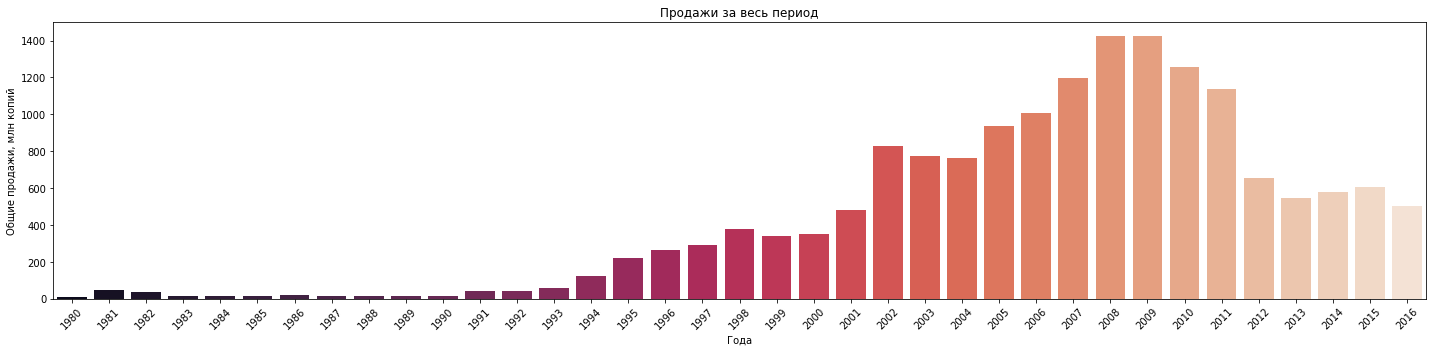

In [21]:
sales_by_year = data.groupby('year_of_release')['name'].count().sort_values(ascending=False)
# Настройка графиков
fig, axes = plt.subplots(figsize=(20, 5))
# Используем barplot для категориальных данных
sns.barplot(x=sales_by_year.index, y=sales_by_year.values, palette='rocket', ax=axes)  
axes.set_title('Продажи за весь период')
axes.set_xlabel('Года')
axes.set_ylabel('Общие продажи, млн копий')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Анализ динамики выпуска игр и рекомендации 

Анализ предоставленных данных показывает, что количество выпущенных игр значительно варьируется в зависимости от года. Основные выводы следующие:

1. Наибольшая активность в выпуске игр наблюдается в период с 2005 по 2011 год, когда было зафиксировано рекордное количество релизов. В частности, в 2009 году было выпущено 1476 игр, в 2008 году — 1457, в 2010 — 1302 и в 2007 — 1197 игр.

2. Начиная с 2012 года, количество выпущенных игр постепенно снижается: в 2012 году было выпущено 653 игры, в 2015 — 606, в 2014 — 582, а в 2016 — 502 игры.

3. До 2000 года наблюдалось значительно меньшее количество релизов, особенно в середине 90-х: до 1990 года ежегодно выпускалось менее 100 игр.

4. Периоды с низкой активностью включают 1980-1990 годы, когда количество игр варьировалось от 9 до 60 в год. С 1995 года начался резкий рост, что привело к увеличению выпуска игр.

 Актуальность данных по периодам: 
 Данные, начиная с 2000-х годов, являются наиболее репрезентативными, поскольку с этого времени начинается массовый выпуск игр. Для анализа актуальных трендов в игровой индустрии и прогнозирования будущего данные за 2000-е и 2010-е годы окажутся наиболее ценными. Данные до 2000 года могут быть менее релевантными, так как рынок был значительно меньше, и технологические, а также потребительские изменения с тех пор были кардинальными.

 Рекомендация: 
Для более глубокого анализа закономерностей и трендов целесообразно сосредоточиться на данных, начиная с 1994 года. При этом, чтобы минимизировать влияние устаревших периодов и лучше отразить текущие тренды и потребительские предпочтения, следует обратить особое внимание на данные за последние три года. Мы проверим данные начиная с 1994 года для понимания долгосрочных тенденций, а затем сосредоточимся на современном периоде.

In [22]:
data = data.loc[data['year_of_release'] >= 1994]

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [23]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

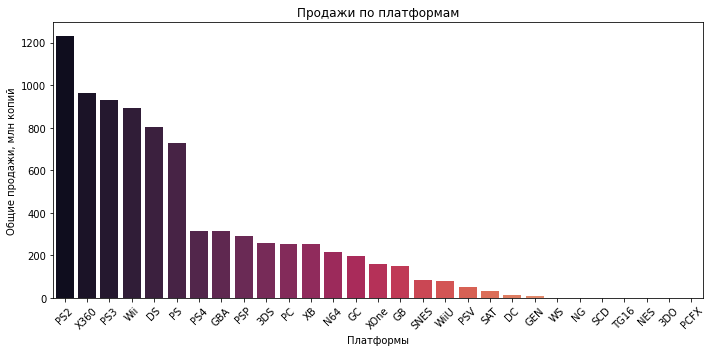

In [24]:
# Настройка графиков
fig, axes = plt.subplots(figsize=(10, 5))
# Используем barplot для категориальных данных
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='rocket', ax=axes)  
axes.set_title('Продажи по платформам')
axes.set_xlabel('Платформы')
axes.set_ylabel('Общие продажи, млн копий')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


На основании представленных данных о накопительных продажах игр на платформах, самой успешной оказалась PlayStation 2, с продажами в объеме 1233.56 млн копий. 

Xbox 360 и PlayStation 3 демонстрировали значительные результаты с продажами 961.24 и 931.33 млн копий соответственно. 

Wii и Nintendo DS заняли четвертое и пятое места с продажами 891.18 и 802.76 млн копий, что подтверждало популярность Nintendo на рынке. 

Платформы более поздних поколений, такие как PS4 и Xbox One, показали меньшие объемы продаж, так как появились на рынке позже и, соответственно, имели меньше времени для накопления продаж.

Построим график в динамике для понимания жизненного цикла платформ:

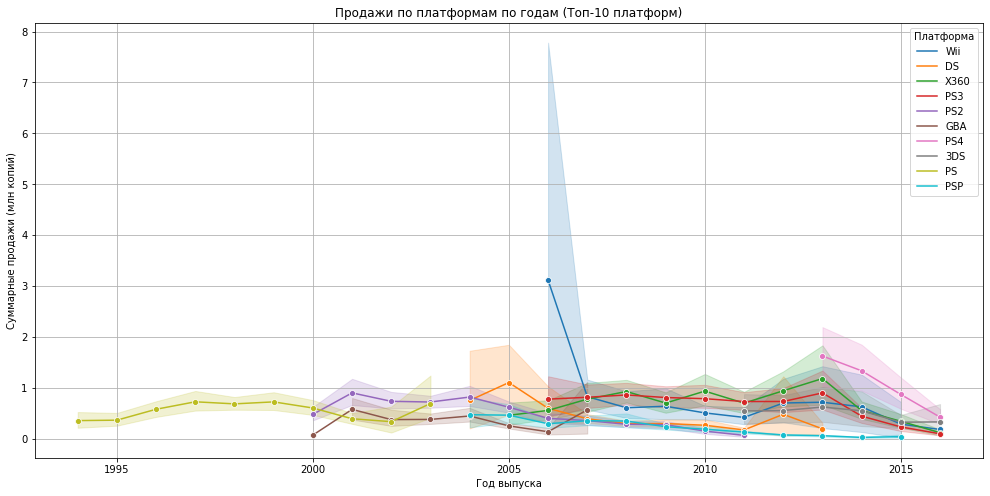

In [25]:
# 2. Выберем платформы с наибольшими продажами (например, топ-10)
top_platforms = platform_sales.head(10).index

# 3. Отфильтруем данные только для этих платформ
top_platforms_data = data[data['platform'].isin(top_platforms)]

# 4. Построим распределение продаж по годам для каждой платформы
plt.figure(figsize=(17, 8))
sns.lineplot(data=top_platforms_data, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Продажи по платформам по годам (Топ-10 платформ)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

Определение жизненного цикла платформ:


Жизненный цикл платформы можно определить по годам появления и исчезновения данных по каждой платформе.

In [26]:
# Группируем данные по платформам и годам выпуска
platform_lifecycle = data.groupby('platform')['year_of_release'].agg(['min', 'max', 'count'])

# Определяем длительность существования платформ
platform_lifecycle['lifecycle'] = platform_lifecycle['max'] - platform_lifecycle['min'] + 1

# display(platform_lifecycle[['min', 'max', 'lifecycle']])

print('Средний жизненный цикл платформы составляет', platform_lifecycle['lifecycle'].median(), 'лет.')


Средний жизненный цикл платформы составляет 6.0 лет.


In [27]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

6.0

Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные должны помочь построить прогноз на 2017 год.

**Выводы по графику изменений продаж по платформам:**

1.  Пик продаж:  На графике видно, что платформа  Wii  имела значительный всплеск продаж около 2006 года, с пиком продаж, который затем быстро пошел на спад. Остальные платформы показали более стабильные, но менее внезапные изменения в продажах.
   
2.  Стабильные продажи:  Платформы  DS ,  PS3 ,  X360 ,  PS2  и другие имели относительно стабильные продажи с небольшими колебаниями в разные годы. Это может свидетельствовать о долгом жизненном цикле этих платформ.

3.  Падение продаж:  Начиная с 2010 года, большинство платформ демонстрируют явное снижение продаж. Это может указывать на завершение жизненного цикла платформ и появление новых консолей.

4.  Долговечность платформ:  Наиболее успешные платформы (такие как  PS2 ,  PS3 ,  X360 ) существуют на рынке около  8-10 лет , после чего их продажи начинают резко снижаться. Например, платформа PS2 была популярна в начале 2000-х, а затем её заменили новейшие консоли, такие как PS3 и PS4.

**Актуальные года для анализа:**
- На графике видно, что основная активность продаж приходится на период с  2000 по 2016 год . В 2016 году большинство платформ начали показывать снижение продаж, что делает данные до этого года актуальными для анализа.
-  Актуальный период  для анализа можно ограничить с  2000 по 2016 год . Данные за этот период помогут построить прогнозы на 2017 год, так как они отражают полные циклы продаж старых и новых платформ.

**Характерный срок существования платформ:**
-  Жизненный цикл платформ  составляет примерно  6 лет . На графике видно, что платформы начинают набирать популярность в течение нескольких лет после выхода, достигают пика продаж и затем продажи начинают снижаться, когда появляется новое поколение консолей.
  

Для целей прогнозирования продаж на 2017 год мы оставим данные за 2014, 2015 и 2016 годы. Использование слишком большого временного интервала может привести к захвату устаревших трендов, особенно в динамично развивающейся индустрии видеоигр. Однако слишком короткий период также не подходит для адекватного прогноза, так как он не даст достаточного объема данных для выявления стабильных тенденций. Данные за последние три года обеспечивают баланс между актуальностью и достаточной исторической информацией для прогнозирования. Таким образом, данные, предшествующие 2014 году, будут удалены из датафрейма.

In [28]:
data_after_2014 = data.loc[data['year_of_release'] >= 2014].reset_index()

#### Определим, какие платформы являются лидерами по продажам, а также те, чьи показатели растут или снижаются. 
Для этого выделим несколько потенциально прибыльных платформ, основываясь на данных о продажах за 2014-2016 гг.


In [29]:
# Определим платформы с наибольшим ростом продаж за последние 3 года
platform_recent_sales = data_after_2014.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Платформы с наибольшими продажами за последние 3 года:")
print(platform_recent_sales)


Платформы с наибольшими продажами за последние 3 года:
platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


Визуализируем полученные данные на графике:

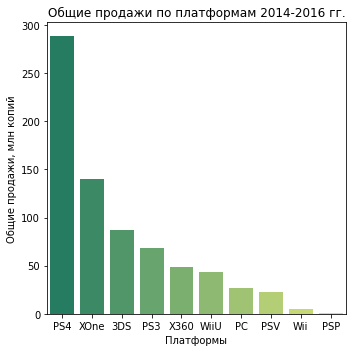

In [30]:
# Настройка графиков
fig, axes = plt.subplots(figsize=(5, 5))
# Используем barplot для категориальных данных
sns.barplot(x=platform_recent_sales.index, y=platform_recent_sales.values, palette='summer', ax=axes)  
axes.set_title('Общие продажи по платформам 2014-2016 гг.')
axes.set_xlabel('Платформы')
axes.set_ylabel('Общие продажи, млн копий')
plt.tight_layout()
plt.show()

Лидерами по продажам за последние два года (с учетом того, что данные за 2016 год еще не полные) являются следующие платформы:

- PS4: 288.15 млн копий;
- XOne: 140.36 млн копий;
- 3DS: 86.68 млн копий;

Для более точного понимания динамики продаж построим столбчатые диаграммы за период 2010-2016 годов, чтобы выявить, какие платформы демонстрируют рост, а какие – спад.


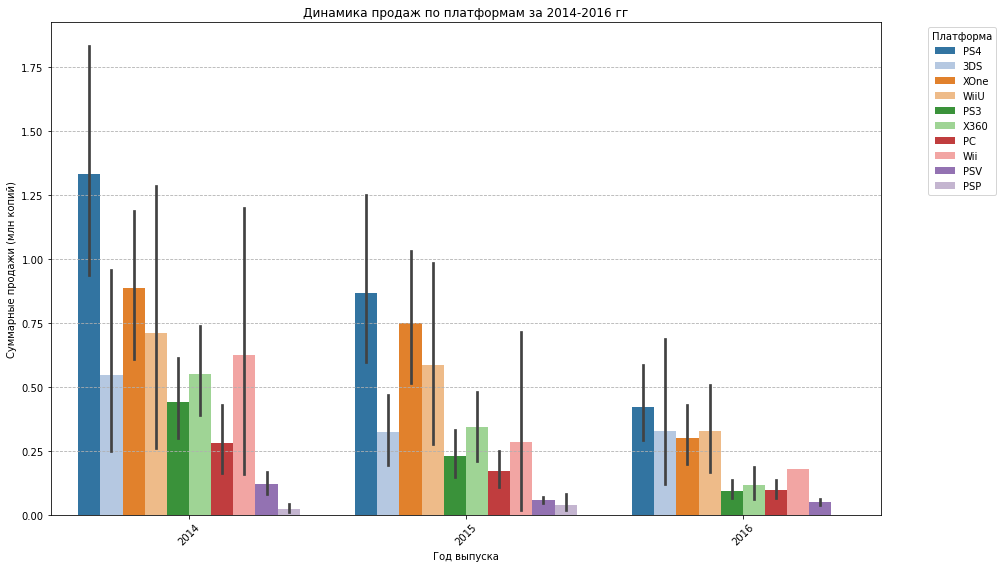

In [31]:
# Устанавливаем новую палитру
sns.set_palette('tab20')

# Строим столбчатую диаграмму для всех платформ начиная с 2010 года
plt.figure(figsize=(14, 8))

# Строим barplot с новой палитрой
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=data_after_2014)

# Настройки графика
plt.title('Динамика продаж по платформам за 2014-2016 гг')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')

# Показываем график
plt.tight_layout()
plt.show()


####  Выводы по графику:

1.  Лидеры по продажам: 
   -  PS4 : Безусловный лидер продаж за последние три года (2014–2016). Продажи остаются стабильными и значительно превышают показатели других платформ. Это делает PS4 ключевой платформой для будущих продаж.
   -  XOne : На втором месте по продажам после PS4. Несмотря на более низкие показатели по сравнению с PS4, платформа остается популярной с довольно стабильными продажами. 
   -  3DS : Замыкает тройку лидеров с умеренными продажами. Это мобильная платформа, и она демонстрирует стабильные продажи, хотя и не на таком высоком уровне, как PS4 и XOne.

2.  Платформы с падающими продажами: 
   -  PS3 : Продажи резко упали после 2014 года, что делает платформу устаревшей и менее перспективной. Учитывая, что PS4 стала новой флагманской консолью, снижение продаж PS3 было ожидаемым.
   -  X360 : Как и PS3, X360 показывает значительное снижение продаж в последние годы и практически исчезает с рынка.
   -  WiiU : Несмотря на то, что это одна из новейших платформ Nintendo, ее продажи также не были высокими, и к 2016 году она уступает большинству конкурентов.
   -  Wii : Продажи Wii практически прекратились, что указывает на завершение жизненного цикла платформы.

3.  Платформы с небольшими продажами: 
   -  PC : Несмотря на глобальную популярность платформы для игр, продажи игр для PC остаются относительно низкими по сравнению с консолями.
   -  PSV : Продажи также на низком уровне, хотя платформа еще представлена на рынке.

##### Потенциально прибыльные платформы:
1.  PS4 : Лидер с большим отрывом. Продажи стабильно высоки, и платформа продолжает доминировать на рынке. Она останется ключевой для компании.
2.  XOne : Хотя и уступает PS4, платформа демонстрирует устойчивые продажи и продолжает оставаться актуальной.
3.  3DS : Мобильная платформа, которая, несмотря на конкуренцию, сохраняет свою нишу и потенциально может приносить прибыль в будущем.

##### Заключение:
-  PS4  и  XOne  остаются самыми перспективными платформами с точки зрения будущих продаж. Обе демонстрируют стабильные показатели, и их можно рассматривать как ключевые для увеличения прибыли в ближайшие годы.  3DS : Мобильная платформа, которая, несмотря на конкуренцию, сохраняет свою нишу и потенциально может приносить прибыль в будущем.
- Старые платформы, такие как  PS3 ,  X360 , и  Wii , теряют позиции и вряд ли будут приносить значительные доходы в будущем.


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

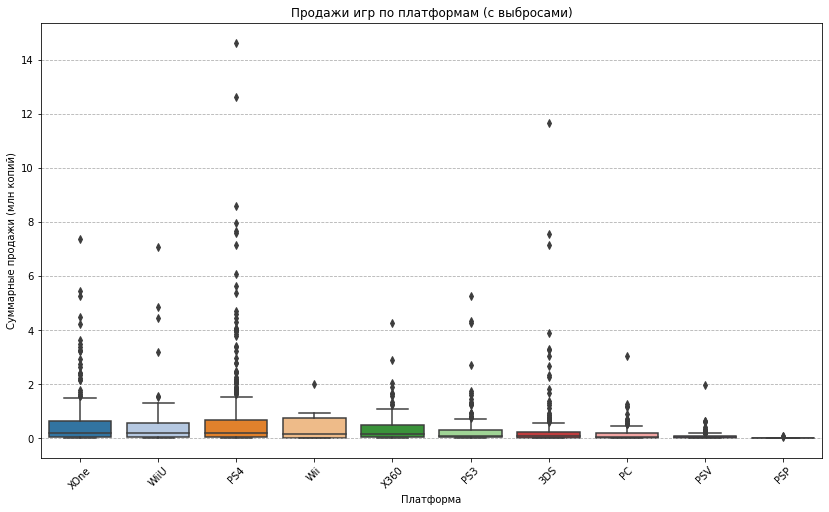

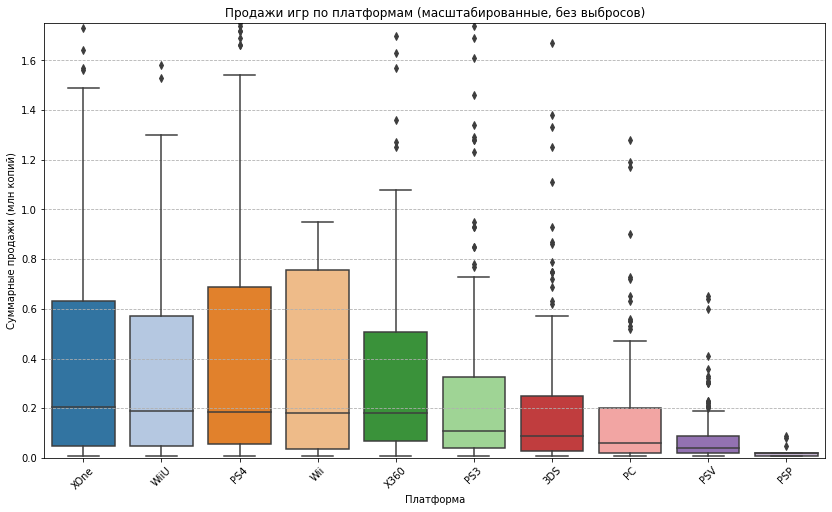

platform
XOne    0.205
WiiU    0.190
PS4     0.185
Wii     0.180
X360    0.180
PS3     0.110
3DS     0.090
PC      0.060
PSV     0.040
PSP     0.020
Name: total_sales, dtype: float64


In [32]:
# Сортировка платформ по медиане продаж (по убыванию)
platform_median_sales = data_after_2014.groupby('platform')['total_sales'].median().sort_values(ascending=False)
sorted_platforms = platform_median_sales.index

# Построение диаграммы размаха с сортировкой платформ по убыванию
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=data_after_2014, order=sorted_platforms)
plt.title('Продажи игр по платформам (с выбросами)')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')
plt.show()

# Построение диаграммы размаха без выбросов с ограничением по оси y и сортировкой платформ
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=data_after_2014, order=sorted_platforms)
plt.title('Продажи игр по платформам (масштабированные, без выбросов)')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)
plt.ylim(0, 1.75)  # Устанавливаем лимит на ось Y
plt.grid(True, axis='y', linestyle='--')
plt.show()

print(platform_median_sales)


На основе медианных продаж игр по различным платформам за 2014–2017 годы можно сделать следующие ключевые выводы:

1.  Платформы нового поколения (XOne, PS4) :
   - Медианы продаж на платформах  XOne  (0,205 млн копий) и  PS4  (0,185 млн копий) относительно выше по сравнению с другими платформами, что говорит о стабильности этих консолей в плане продаж. Несмотря на наличие выбросов, платформы демонстрируют уверенные медианные показатели, что означает, что даже средние игры на этих платформах продаются неплохо.
   - Это подтверждает, что  XOne  и  PS4  являются лидерами текущего поколения консолей, и их успех стабилен. Стримчик должен ориентироваться на данные платформы, так как, несмотря на непредсказуемость хитовых продаж, именно на них наблюдается устойчивая база покупателей.

2.  WiiU :
   - Интересно, что  WiiU  (0,190 млн копий) показывает высокую медиану, близкую к показателям XOne и PS4, хотя эта платформа не так популярна в глобальном контексте. Тем не менее, стабильность её продаж может быть привлекательной для разработчиков.

3.  Платформы предыдущего поколения (Wii, X360, PS3) :
   - Медианы продаж на  Wii  и  X360  (по 0,180 млн копий) также остаются на высоком уровне. Это указывает на то, что, несмотря на снижение их популярности, эти платформы всё ещё обеспечивают относительно стабильные продажи для игр, которые продолжают выходить на них.
   - В то же время  PS3  (0,110 млн копий) демонстрирует меньшую стабильность по медиане, что говорит о том, что её актуальность снижается быстрее, чем у Wii и X360.

4.  3DS :
   -  3DS  демонстрирует медиану продаж в 0,090 млн копий, что, хотя и ниже по сравнению с крупными консолями, показывает значительный потенциал для отдельных игр, которые могут стать хитами. Это подтверждается наличием выбросов с очень высокими продажами, что делает платформу интересной для определенных жанров и аудиторий.

5.  PC :
   - На  PC  наблюдается одна из самых низких медиан — всего 0,060 млн копий. Несмотря на наличие больших выбросов на графике, общая стабильность продаж на платформе ниже, чем на консолях. Это может быть связано с более широкой аудиторией, но менее концентрированной на конкретных играх.

6.  Портативные устройства (PSV, PSP) :
   - Платформы  PSV  и  PSP  показывают самые низкие результаты по медиане — 0,040 млн и 0,020 млн копий соответственно. Это подтверждает, что портативные консоли значительно уступают по стабильности продаж и популярности основным консолям и 3DS. Стримчику стоит меньше ориентироваться на эти платформы, так как их потенциал для значимых продаж ограничен.

 Общие выводы:

-  XOne  и  PS4  — это основные платформы, на которые Стримчику стоит обратить внимание, так как они демонстрируют не только крупные выбросы в продажах, но и стабильность через высокие медианные значения.
- Платформы  Wii ,  X360  и  WiiU  также показывают достойные медианные продажи, что может свидетельствовать о существующем потенциале для игр на них.
-  3DS  — это особый случай, где медиана невелика, но есть игры с исключительными продажами, что делает её интересной для нишевых игр или жанров.
-  PC  и портативные устройства значительно отстают по медиане, что делает их менее приоритетными для крупных проектов, ориентированных на массовую аудиторию.

Таким образом, стратегия Стримчика должна строиться на приоритете для  XOne ,  PS4  и, возможно,  3DS , в зависимости от аудитории и характера игр.


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для примера возьмем PS4:


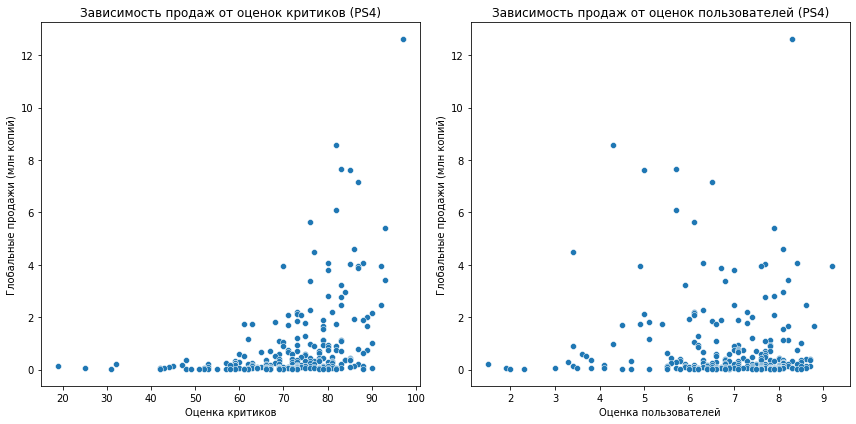

Корреляция между оценками критиков и продажами: 0.40
Корреляция между оценками пользователей и продажами: -0.04


In [33]:
# Выбор данных для популярной платформы (PS4)
ps4_data_after_2014 = data_after_2014[data_after_2014['platform'] == 'PS4']

# Построение диаграммы рассеяния для оценок критиков и продаж
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data_after_2014)
plt.title('Зависимость продаж от оценок критиков (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')

# Построение диаграммы рассеяния для оценок пользователей и продаж
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data_after_2014)
plt.title('Зависимость продаж от оценок пользователей (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

plt.tight_layout()
plt.show()

# Вычисление корреляции между отзывами критиков и продажами
critic_corr_ps4 = ps4_data_after_2014['critic_score'].corr(ps4_data_after_2014['total_sales'])
user_corr_ps4 = ps4_data_after_2014['user_score'].corr(ps4_data_after_2014['total_sales'])

print(f'Корреляция между оценками критиков и продажами: {critic_corr_ps4:.2f}')
print(f'Корреляция между оценками пользователей и продажами: {user_corr_ps4:.2f}')


Чтобы убедиться, что анализ объективен и  корреляция действительно такая же на других платформах, дополнительно посчитаем корреляцию и построим графики для еще 4 платформ (XOne, PS, X360, Wii):

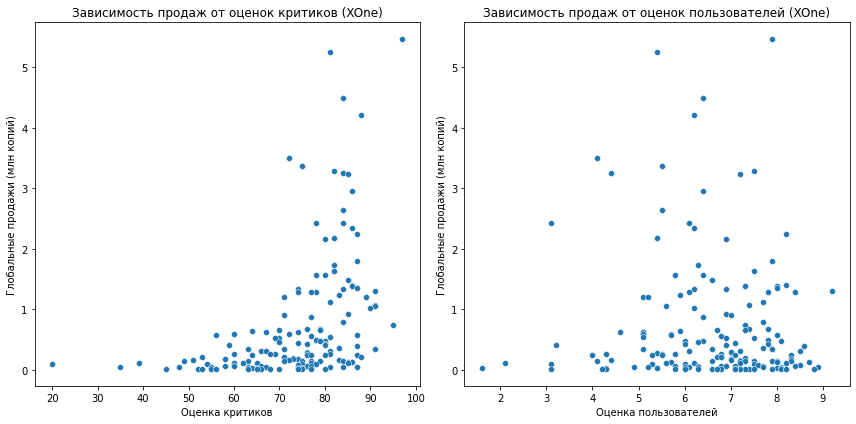

Корреляция между оценками критиков и продажами XOne: 0.43
Корреляция между оценками пользователей и продажами XOne: -0.07


In [34]:
# Выбор данных для популярной платформы (XOne)
XOne_data = data_after_2014[data_after_2014['platform'] == 'XOne']

# Построение диаграммы рассеяния для оценок критиков и продаж
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=XOne_data)
plt.title('Зависимость продаж от оценок критиков (XOne)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')

# Построение диаграммы рассеяния для оценок пользователей и продаж
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=XOne_data)
plt.title('Зависимость продаж от оценок пользователей (XOne)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

plt.tight_layout()
plt.show()

# Вычисление корреляции между отзывами критиков и продажами
critic_corr_XOne = XOne_data['critic_score'].corr(XOne_data['total_sales'])
user_corr_XOne= XOne_data['user_score'].corr(XOne_data['total_sales'])

print(f'Корреляция между оценками критиков и продажами XOne: {critic_corr_XOne:.2f}')
print(f'Корреляция между оценками пользователей и продажами XOne: {user_corr_XOne:.2f}')

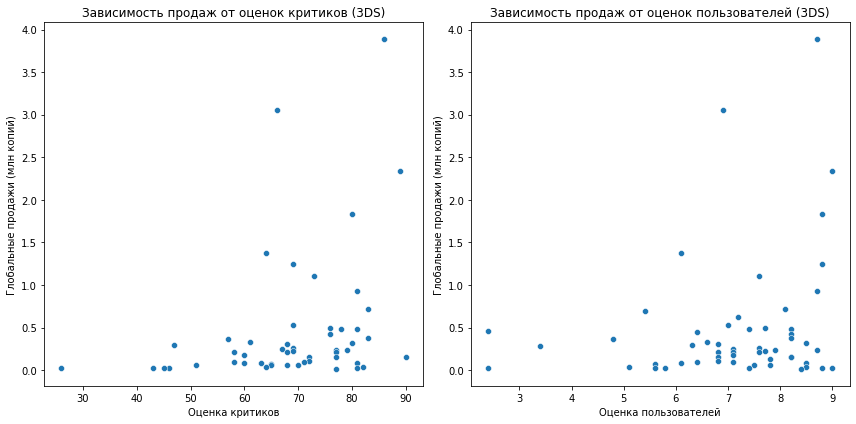

Корреляция между оценками критиков и продажами 3DS: 0.31
Корреляция между оценками пользователей и продажами 3DS: 0.22


In [35]:
# Выбор данных для популярной платформы (PS)
pl_3DS_data = data_after_2014[data_after_2014['platform'] == '3DS']

# Построение диаграммы рассеяния для оценок критиков и продаж
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=pl_3DS_data)
plt.title('Зависимость продаж от оценок критиков (3DS)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')

# Построение диаграммы рассеяния для оценок пользователей и продаж
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=pl_3DS_data)
plt.title('Зависимость продаж от оценок пользователей (3DS)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

plt.tight_layout()
plt.show()

# Вычисление корреляции между отзывами критиков и продажами
critic_corr_3DS = pl_3DS_data['critic_score'].corr(pl_3DS_data['total_sales'])
user_corr_3DS = pl_3DS_data['user_score'].corr(pl_3DS_data['total_sales'])

print(f'Корреляция между оценками критиков и продажами 3DS: {critic_corr_3DS:.2f}')
print(f'Корреляция между оценками пользователей и продажами 3DS: {user_corr_3DS:.2f}')


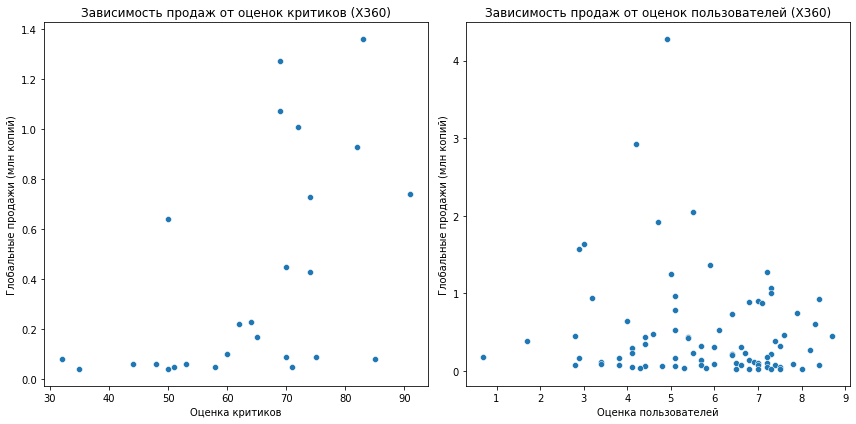

Корреляция между оценками критиков и продажами X360: 0.53
Корреляция между оценками пользователей и продажами X360: -0.14


In [36]:
# Выбор данных для популярной платформы (X360)
X360_data = data_after_2014[data_after_2014['platform'] == 'X360']

# Построение диаграммы рассеяния для оценок критиков и продаж
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=X360_data)
plt.title('Зависимость продаж от оценок критиков (X360)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')

# Построение диаграммы рассеяния для оценок пользователей и продаж
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=X360_data)
plt.title('Зависимость продаж от оценок пользователей (X360)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

plt.tight_layout()
plt.show()

# Вычисление корреляции между отзывами критиков и продажами
critic_corr_X360 = X360_data['critic_score'].corr(X360_data['total_sales'])
user_corr_X360= X360_data['user_score'].corr(X360_data['total_sales'])

print(f'Корреляция между оценками критиков и продажами X360: {critic_corr_X360:.2f}')
print(f'Корреляция между оценками пользователей и продажами X360: {user_corr_X360:.2f}')


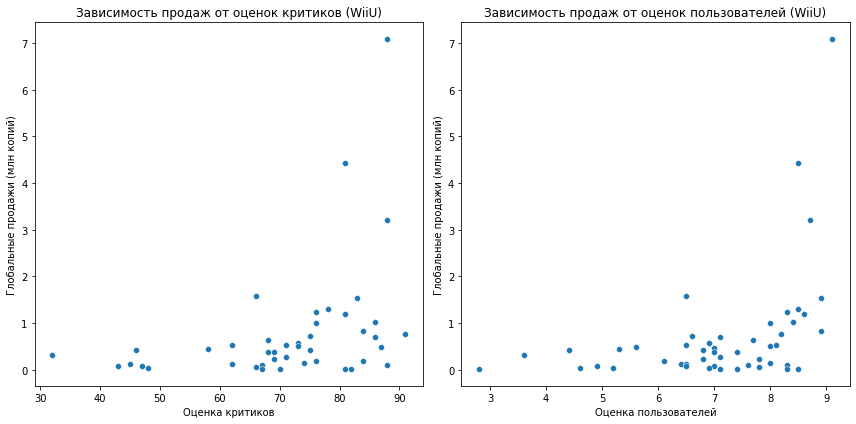

Корреляция между оценками критиков и продажами WiiU: 0.37
Корреляция между оценками пользователей и продажами WiiU: 0.41


In [37]:
# Выбор данных для популярной платформы (Wii)
WiiU_data = data_after_2014[data_after_2014['platform'] == 'WiiU']

# Построение диаграммы рассеяния для оценок критиков и продаж
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=WiiU_data)
plt.title('Зависимость продаж от оценок критиков (WiiU)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')

# Построение диаграммы рассеяния для оценок пользователей и продаж
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=WiiU_data)
plt.title('Зависимость продаж от оценок пользователей (WiiU)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')

plt.tight_layout()
plt.show()

# Вычисление корреляции между отзывами критиков и продажами
critic_corr_WiiU = WiiU_data['critic_score'].corr(WiiU_data['total_sales'])
user_corr_WiiU = WiiU_data['user_score'].corr(WiiU_data['total_sales'])

print(f'Корреляция между оценками критиков и продажами WiiU: {critic_corr_WiiU:.2f}')
print(f'Корреляция между оценками пользователей и продажами WiiU: {user_corr_WiiU:.2f}')


**Выводы по общей корреляции:**

1.  Корреляция между оценками критиков и продажами на платформе PS4: 0.40   
   - Умеренно положительная корреляция. Это говорит о том, что игры, получившие более высокие оценки от критиков, чаще всего имеют более высокие продажи. Однако, корреляция не слишком сильная, что указывает на то, что хорошие оценки критиков не всегда гарантируют коммерческий успех игры.
   
2.  Корреляция между оценками пользователей и продажами на платформе PS4: -0.04   
   - Почти нулевая и даже слабая отрицательная корреляция. Это означает, что оценки пользователей практически не влияют на продажи игр. В некоторых случаях может быть даже обратная зависимость, что указывает на возможное недовольство пользователей популярными играми или наоборот — не самые популярные игры получают высокие пользовательские оценки.

**Соотнесение с продажами на других платформах:**

1.  XOne (корреляция с оценками критиков: 0.43, с оценками пользователей: -0.07)   
   - Корреляция между оценками критиков и продажами на платформе XOne выше, чем средняя по всем платформам (0.43 против 0.40). Это значит, что для XOne влияние критиков на продажи немного выше. Однако, как и в среднем, оценки пользователей оказывают отрицательное влияние на продажи, что свидетельствует о слабом влиянии пользовательских оценок на выбор игр для этой платформы.

2.  3DS (корреляция с оценками критиков: 0.31, с оценками пользователей: 0.22)   
   - На платформе PlayStation корреляция между оценками критиков и продажами ниже (0.31), чем в среднем по всем платформам. Это говорит о том, что для игр на 3DS критические отзывы оказывают меньшее влияние на продажи. Однако корреляция между оценками пользователей и продажами положительная (0.22), что необычно и указывает на то, что для игр на 3DS пользовательские оценки играют большую роль в коммерческом успехе.

3.  X360 (корреляция с оценками критиков: 0.53, с оценками пользователей: -0.14)   
   - X360 имеет самую высокую корреляцию с оценками критиков (0.53), что означает, что на этой платформе хорошие критические отзывы существенно способствуют увеличению продаж. В то же время, отрицательная корреляция с оценками пользователей (-0.14) говорит о том, что для X360 пользовательские оценки не только не помогают, но и могут негативно коррелировать с продажами.

4.  WiiU (корреляция с оценками критиков: 0.37, с оценками пользователей: 0.41)   
   - На платформе WiiU есть умеренная положительная корреляция как с оценками критиков (0.37), так и с оценками пользователей (0.41). Это платформа, на которой влияние как критиков, так и пользователей выше, чем в среднем. Особенно примечательно, что WiiU — единственная платформа, на которой корреляция с оценками пользователей достаточно высокая (0.41), что может означать, что пользовательские отзывы оказывают значительное влияние на выбор покупателей.

**Общие выводы**

1.  Роль оценок критиков:   
   На большинстве платформ, кроме 3DS, оценки критиков оказывают умеренное или высокое влияние на продажи игр. Особенно это заметно на X360, где корреляция с оценками критиков самая высокая (0.53), что свидетельствует о значительном влиянии профессиональных оценок на покупательские решения. На платформе PlayStation влияние оценок критиков значительно ниже, что может свидетельствовать о том, что игроки на этой платформе больше ориентируются на другие факторы (возможно, бренд игр или франшизы).

2.  Роль оценок пользователей:   
   Влияние оценок пользователей, как правило, слабо отрицательное или нейтральное на большинстве платформ. Исключением являются 3DS и WiiU, где корреляция положительная, а для WiiU даже довольно высокая (0.41). Это может говорить о том, что на этих платформах пользователи более внимательны к отзывам других игроков при выборе игр.

3.  Вывод для будущих продаж:   
   Важно учитывать, что при прогнозировании продаж критические отзывы могут играть важную роль на всех платформах, особенно на XOne и X360. Однако на PlayStation и WiiU следует обращать внимание также на пользовательские отзывы, так как они могут заметно влиять на продажи.

#### Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры, жанры с высокими и низкими продажами:

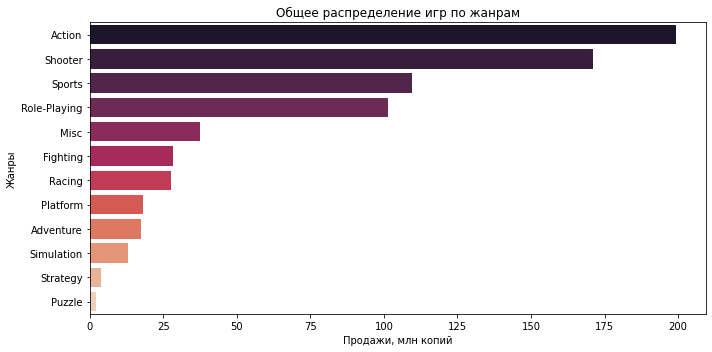

Общее распределение игр по жанрам (суммарные продажи): 

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64


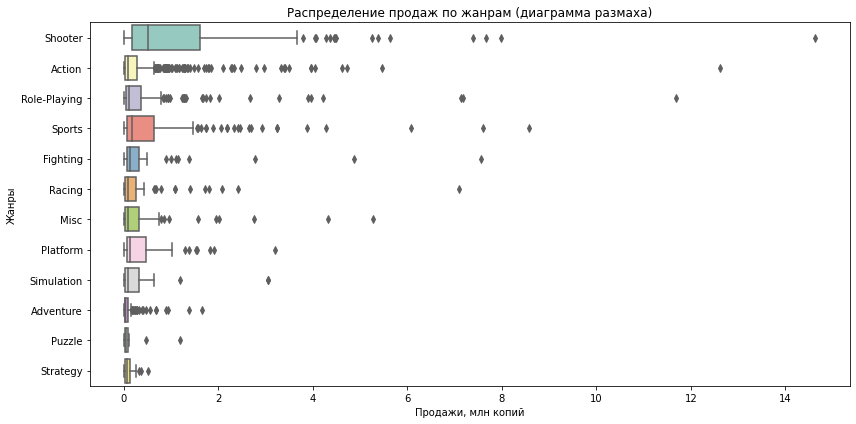

Распределение медианных продаж по жанрам: 

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


In [38]:
# Группировка данных по жанрам и расчет медианных продаж
genre_sales = data_after_2014.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_median_sales = data_after_2014.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Построение столбчатой диаграммы суммарных продаж по жанрам
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(y=genre_sales.index, x=genre_sales.values, palette='rocket', ax=axes)
axes.set_title('Общее распределение игр по жанрам')
axes.set_xlabel('Продажи, млн копий')
axes.set_ylabel('Жанры')
plt.tight_layout()
plt.show()

print(f'Общее распределение игр по жанрам (суммарные продажи): \n\n{genre_sales}')

# Построение boxplot диаграммы для жанров, чтобы отразить медианные продажи
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_sales', y='genre', data=data_after_2014, palette='Set3')
plt.title('Распределение продаж по жанрам (диаграмма размаха)')
plt.xlabel('Продажи, млн копий')
plt.ylabel('Жанры')
plt.tight_layout()
plt.show()

# Вывод медианных продаж по жанрам
print(f'Распределение медианных продаж по жанрам: \n\n{genre_median_sales}')


**Анализ и выводы по распределению игр по жанрам:**

1.  Суммарные продажи: 
   -  Action  (199.36 млн копий) и  Shooter  (170.94 млн копий) являются самыми прибыльными жанрами по общим продажам. Эти жанры значительно выделяются по объему проданных копий.
   - Следом идут  Sports  (109.48 млн копий) и  Role-Playing  (101.44 млн копий), что показывает их популярность среди игроков.
   - Жанры, такие как  Misc ,  Fighting , и  Racing , также имеют умеренные продажи, но далеко уступают лидерам.
   - Жанры  Simulation ,  Strategy  и особенно  Puzzle  демонстрируют самые низкие продажи.

2.  Медианные продажи: 
   -  Shooter  является самым стабильным жанром, с медианными продажами в 0.515 млн копий. Это говорит о том, что игры этого жанра чаще всего продаются лучше, чем игры в других жанрах, независимо от выбросов.
   -  Sports ,  Platform ,  Fighting  и  Role-Playing  также имеют относительно высокие медианные продажи, что указывает на устойчивый спрос на эти жанры.
   -  Action , несмотря на высокие суммарные продажи, имеет низкую медианную продажу (0.090 млн копий). Это может говорить о том, что большинство игр этого жанра продаются хуже среднего уровня, и только несколько игр ("хиты") создают общую картину высоких продаж.
   -  Puzzle  и  Adventure  имеют самые низкие медианные значения, что указывает на слабый и нерегулярный спрос на игры этих жанров.

**Выводы:**

-  Action и Shooter  являются наиболее прибыльными жанрами по общим продажам, но если рассматривать  медианные продажи , то  Shooter  оказывается более стабильным жанром. Это может говорить о том, что  Shooter  имеет более равномерные и предсказуемые продажи.
  
-  Sports  и  Platform  также показывают хорошие медианные продажи, что указывает на стабильный спрос в этих жанрах.

-  Action , несмотря на лидерство по общим продажам, имеет довольно низкую медианную продажу, что указывает на значительное влияние отдельных хитов на общий объем продаж. Этот жанр менее стабилен по сравнению с тем же  Shooter .

- Жанры с низкими суммарными продажами, такие как  Puzzle ,  Strategy , и  Adventure , показывают также низкие медианные значения. Это свидетельствует о том, что они редко становятся прибыльными и менее популярны среди широких масс.

**Рекомендации:**
- Если цель — стабильно высокие продажи, имеет смысл фокусироваться на жанрах с высокими медианными продажами, таких как  Shooter ,  Sports , и  Platform .
- Жанры с высокими суммарными, но низкими медианными продажами, такие как  Action , можно рассматривать как высокорисковые: они могут привести как к большим успехам, так и к провалам.

#### Промежуточные выводы


Ваш исследовательский анализ данных о рынке видеоигр является очень подробным и дает полное представление о динамике выпуска игр, продажах по платформам и влиянии жанров на успех игр. Вот обобщение ключевых выводов и рекомендаций:

Общие Выводы:

1.  Динамика выпуска игр :
   -  Пик активных лет : Наибольшее количество релизов зафиксировано в период с 2005 по 2011 годы, с рекордом в 2009 году (1476 игр).
   -  Снижение после 2012 года : После 2012 года наблюдается устойчивое снижение количества выпущенных игр, что может свидетельствовать о насыщении рынка или изменении предпочтений потребителей.
   -  Меньше релизов до 2000 года : до 2000 года количество релизов было значительно ниже, что говорит о меньшем объеме рынка в тот период.

2.  Продажи по платформам :
   -  Лидеры по продажам : PlayStation 2 остается самой успешной платформой с 1233.56 млн копий, следом идут Xbox 360 и PlayStation 3.
   - Платформы последнего поколения (PS4 и Xbox One) имеют меньшие объемы продаж, поскольку появились позже и не успели накопить значительное количество продаж.
   
3. Медианы продаж по платформам (2014–2017):

   - PS4 и XOne демонстрируют стабильные медианные продажи (0,185 млн и 0,205 млн копий соответственно), что свидетельствует о том, что на этих платформах средний уровень продаж выше, чем на многих других платформах.
   - WiiU также показывает сравнительно высокую медиану (0,190 млн копий), что говорит о стабильных продажах, несмотря на относительно низкую популярность.
   - Платформы предыдущего поколения (Wii и X360) сохраняют медианные продажи на уровне 0,180 млн копий, что показывает, что они остаются востребованными у определённых аудиторий, хотя их популярность снижается.
   - 3DS демонстрирует медиану в 0,090 млн копий, что ниже по сравнению с крупными консолями, но платформа всё ещё способна выпускать игры, которые могут стать большими хитами.
   - PC (0,060 млн копий) и портативные устройства, такие как PSV (0,040 млн копий) и PSP (0,020 млн копий), имеют значительно меньшие медианные продажи, что делает их менее привлекательными для массовых проектов.

4.  Анализ трендов продаж :
   -  Стабильные продажи : PS4, XOne и 3DS демонстрируют стабильные продажи с возможностью дальнейшего роста, в то время как старые платформы, такие как PS3 и Wii, показывают явное снижение.
   -  Жизненный цикл : Средний жизненный цикл платформ составляет около 6 лет, после чего продажи начинают снижаться.

5.  Влияние оценок на продажи :
   -  Корреляция с оценками критиков : На большинстве платформ положительная корреляция между оценками критиков и продажами. Для X360 корреляция максимальна (0.53).
   -  Оценки пользователей : Слабое влияние оценок пользователей на продажи, в некоторых случаях даже отрицательное.

6.  Жанровый анализ :
   -  Прибыльные жанры : Action и Shooter являются самыми прибыльными по общим продажам, однако Shooter демонстрирует более стабильные медианные показатели.
   -  Меньше всего успешных жанров : Жанры, такие как Puzzle, Strategy и Adventure, имеют низкие продажи как в общем, так и по медиане.

Рекомендации:

1.  Фокус на успешные платформы : Рекомендуется сосредоточиться на PlayStation 4 и Xbox One, поскольку они продемонстрировали стабильные продажи и продолжают быть актуальными на рынке.

2.  Анализ данных 2014-2016 годов : Использование данных последних трех лет для построения прогнозов на 2017 год. Это минимизирует влияние устаревших трендов и позволяет более точно предсказать будущие продажи.

3.  Сосредоточение на прибыльных жанрах : Рассмотрение жанров с высокими медианными продажами, таких как Shooter и Sports, для разработки новых игр.

4.  Учет отзывов : Понимание важности оценок критиков и пользователей в зависимости от платформы. На некоторых платформах критические отзывы оказывают большее влияние, в то время как на других пользователи имеют более значительное влияние.

5.  Рынок мобильных платформ : Учитывая успешные результаты 3DS, стоит также рассмотреть разработку игр для мобильных платформ, которые могут быть прибыльными.

Для успешной разработки и продвижения новых игр, следует учитывать как платформенные, так и жанровые особенности, а также влияние критических и пользовательских оценок.


### Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишим различия в долях продаж.
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


1. Топ-5 популярных жанров по регионам:

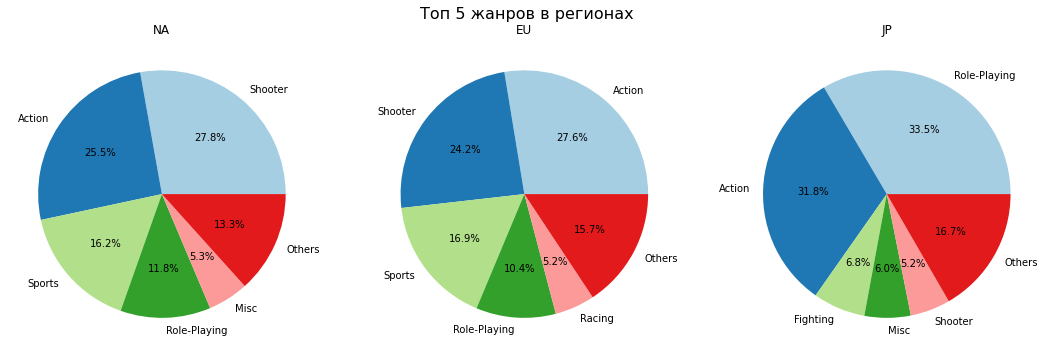

Топ-5 жанров в Северной Америке:
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Others          37.86
dtype: float64

Топ-5 жанров в Европе:
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Others          42.45
dtype: float64

Топ-5 жанров в Японии:
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Others          15.50
dtype: float64


In [39]:
# Подготовка данных: Добавляем категорию "Другие"
def add_others_category_genre(sales, total_sales):
    # Суммируем все остальные жанры, не попавшие в топ-5
    other_sales = total_sales - sales.sum()
    sales_with_others = sales.append(pd.Series(other_sales, index=['Others']))
    return sales_with_others

# Топ-5 жанров по регионам
top_genres_na = data_after_2014.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = data_after_2014.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = data_after_2014.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Общие продажи по регионам для добавления категории "Другие"
total_na_sales = data_after_2014['na_sales'].sum()
total_eu_sales = data_after_2014['eu_sales'].sum()
total_jp_sales = data_after_2014['jp_sales'].sum()

# Добавляем категорию "Другие"
top_genres_na = add_others_category_genre(top_genres_na, total_na_sales)
top_genres_eu = add_others_category_genre(top_genres_eu, total_eu_sales)
top_genres_jp = add_others_category_genre(top_genres_jp, total_jp_sales)

# Настройка графиков для трех круговых диаграмм в одном ряду
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Заголовок для всех графиков
fig.suptitle('Топ 5 жанров в регионах', fontsize=16)

# Северная Америка
axes[0].pie(top_genres_na, autopct='%1.1f%%', labels=top_genres_na.index, colors=plt.cm.Paired.colors)
axes[0].set_title('NA')

# Европа
axes[1].pie(top_genres_eu, autopct='%1.1f%%', labels=top_genres_eu.index, colors=plt.cm.Paired.colors)
axes[1].set_title('EU')

# Япония
axes[2].pie(top_genres_jp, autopct='%1.1f%%', labels=top_genres_jp.index, colors=plt.cm.Paired.colors)
axes[2].set_title('JP')

# Убираем лишние оси
plt.tight_layout()
plt.show()

# Выведем результаты
print("Топ-5 жанров в Северной Америке:")
print(top_genres_na)
print("\nТоп-5 жанров в Европе:")
print(top_genres_eu)
print("\nТоп-5 жанров в Японии:")
print(top_genres_jp)


Краткие выводы о топ-5 жанрах по регионам:

1.  Северная Америка (NA) :
   -  Лидером  жанров в Северной Америке является  Shooter (79.02 млн копий) , что свидетельствует о высокой популярности игр с элементами стрельбы.
   - На втором месте находится  Action  (72.53 млн), а  Sports  замыкает тройку (46.13 млн). Это указывает на интерес к динамичным играм и спортивным симуляторам.
   -  Role-Playing  (33.47 млн) и  Misc  (15.05 млн) занимают меньшую долю, но остаются важными жанрами для рынка.

2.  Европа (EU) :
   -  Action  лидирует в Европе с продажами в  74.68 млн копий , что демонстрирует высокий спрос на динамичные игры.
   -  Shooter  (65.52 млн) и  Sports  (45.73 млн) также очень популярны, повторяя североамериканские тренды.
   - Жанры  Role-Playing  (28.17 млн) и  Racing  (14.13 млн) замыкают пятёрку, отражая интерес к ролевым играм и гонкам.

3.  Япония (JP) :
   - В Японии  Role-Playing  является безусловным лидером с  31.16 млн копий , что подтверждает склонность японского рынка к ролевым играм.
   -  Action  занимает второе место (29.58 млн), также показывая высокую популярность.
   - Жанры  Fighting  (6.37 млн),  Misc  (5.61 млн) и  Shooter  (4.87 млн) значительно уступают, что свидетельствует о меньшей популярности шутеров и разнообразных жанров по сравнению с Западом.


Общие выводы:
- В  Северной Америке и Европе  лидируют жанры  Action  и  Shooter , которые значительно превосходят остальные.
- В  Японии , напротив,  Role-Playing  игры имеют наибольшие продажи, что говорит о культурных различиях в предпочтениях жанров.
- Спортивные игры популярны и в Северной Америке, и в Европе, но значительно уступают другим жанрам в Японии.


2.  Топ-5 популярных платформ по регионам

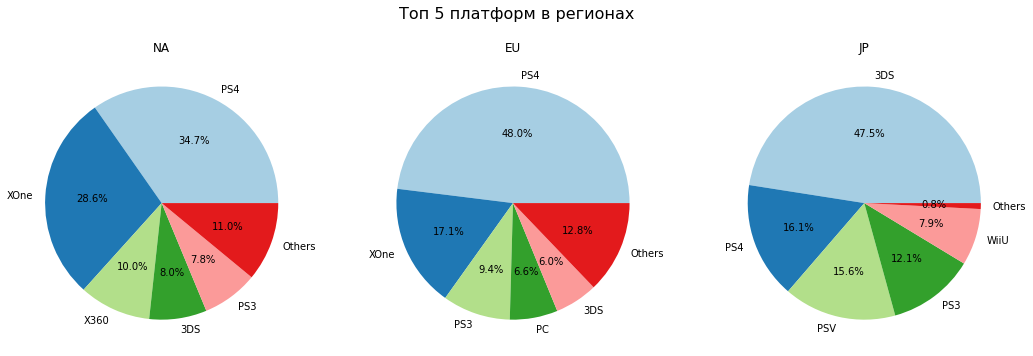

Топ-5 платформ в Северной Америке:
PS4       98.61
XOne      81.27
X360      28.30
3DS       22.64
PS3       22.05
Others    31.19
dtype: float64

Топ-5 платформ в Европе:
PS4       130.04
XOne       46.25
PS3        25.54
PC         17.97
3DS        16.12
Others     34.76
dtype: float64

Топ-5 платформ в Японии:
3DS       44.24
PS4       15.02
PSV       14.54
PS3       11.22
WiiU       7.31
Others     0.76
dtype: float64


In [40]:

# Подготовка данных: Добавляем категорию "Другие"
def add_others_category_pl(sales, total_sales):
    # Суммируем все остальные платформы, не попавшие в топ-5
    other_sales = total_sales - sales.sum()
    sales_with_others = sales.append(pd.Series(other_sales, index=['Others']))
    return sales_with_others

# Топ-5 платформ по регионам
top_platforms_na = data_after_2014.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = data_after_2014.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = data_after_2014.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Общие продажи по регионам для добавления категории "Другие"
total_na_sales = data_after_2014['na_sales'].sum()
total_eu_sales = data_after_2014['eu_sales'].sum()
total_jp_sales = data_after_2014['jp_sales'].sum()

# Добавляем категорию "Другие"
top_platforms_na = add_others_category_pl(top_platforms_na, total_na_sales)
top_platforms_eu = add_others_category_pl(top_platforms_eu, total_eu_sales)
top_platforms_jp = add_others_category_pl(top_platforms_jp, total_jp_sales)

# Настройка графиков для трех круговых диаграмм в одном ряду
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Заголовок для всех графиков
fig.suptitle('Топ 5 платформ в регионах', fontsize=16)

# Северная Америка
axes[0].pie(top_platforms_na, autopct='%1.1f%%', labels=top_platforms_na.index, colors=plt.cm.Paired.colors)
axes[0].set_title('NA')

# Европа
axes[1].pie(top_platforms_eu, autopct='%1.1f%%', labels=top_platforms_eu.index, colors=plt.cm.Paired.colors)
axes[1].set_title('EU')

# Япония
axes[2].pie(top_platforms_jp, autopct='%1.1f%%', labels=top_platforms_jp.index, colors=plt.cm.Paired.colors)
axes[2].set_title('JP')

# Убираем лишние оси
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Учитываем заголовок
plt.show()

# Выведем результаты
print("Топ-5 платформ в Северной Америке:")
print(top_platforms_na)
print("\nТоп-5 платформ в Европе:")
print(top_platforms_eu)
print("\nТоп-5 платформ в Японии:")
print(top_platforms_jp)

Краткие выводы о топ-5 платформах по регионам на основе обновленных данных:

1. Северная Америка (NA):
   -  PlayStation 4 (PS4)  — является самой популярной платформой с 98.61 млн проданных копий игр, что подтверждает высокую популярность Sony в этом регионе.
   -  Xbox One (XOne)  — занимает второе место с 81.27 млн копий, что отражает сильное присутствие Microsoft на североамериканском рынке.
   -  Xbox 360 (X360)  — на третьем месте с 28.30 млн копий, несмотря на возраст платформы, она сохраняет высокий уровень продаж.
   -  Nintendo 3DS  — занимает четвёртое место с 22.64 млн проданных копий, что подчёркивает популярность портативных консолей Nintendo.
   -  PlayStation 3 (PS3)  — замыкает пятёрку с 22.05 млн копий, что говорит о долгосрочной популярности данной платформы.
   - Категория  "Others"  включает 31.19 млн проданных копий на других платформах, что указывает на широкий выбор консолей на рынке.

2. Европа (EU):
   -  PlayStation 4 (PS4)  — доминирует с 130.04 млн проданных копий игр, что подчеркивает явное преимущество Sony на европейском рынке.
   -  Xbox One (XOne)  — занимает второе место с 46.25 млн копий, что демонстрирует более низкий спрос на платформу от Microsoft в Европе по сравнению с Северной Америкой.
   -  PlayStation 3 (PS3)  — на третьем месте с 25.54 млн копий, что свидетельствует о долгосрочной популярности консоли Sony.
   -  PC  — выделяется в Европе, занимая четвёртое место с 17.97 млн копий, что подчёркивает важность компьютерных игр для европейских геймеров.
   -  Nintendo 3DS  — занимает пятое место с 16.12 млн копий, показывая стабильную популярность портативных устройств в Европе.
   - Категория  "Others"  включает 34.76 млн проданных копий на других платформах, что отражает разнообразие рынка.

3. Япония (JP):
   -  Nintendo 3DS  — является лидером с 44.24 млн проданных копий игр, что подтверждает любовь японских игроков к портативным устройствам.
   -  PlayStation 4 (PS4)  — на втором месте с 15.02 млн копий, показывая высокие, но менее значительные результаты по сравнению с портативными консолями.
   -  PlayStation Vita (PSV)  — занимает третье место с 14.54 млн копий, что указывает на популярность этой портативной консоли исключительно на японском рынке.
   -  PlayStation 3 (PS3)  — с 11.22 млн копий занимает четвёртое место, что подчеркивает устойчивость бренда Sony в Японии.
   -  Wii U  — занимает пятое место с 7.31 млн копий, показывая умеренные результаты.
   - Категория  "Others"  составляет всего 0.76 млн копий, что отражает узкий выбор платформ на японском рынке, кроме популярных брендов.

Общие выводы:
-  Северная Америка  демонстрирует явное доминирование  PlayStation 4  и  Xbox One , что подчёркивает популярность домашних консолей в этом регионе. Несмотря на возраст,  Xbox 360  продолжает оставаться в топе.
- В  Европе  также доминирует  PlayStation 4 , но значительно ниже по продажам  Xbox One  по сравнению с Северной Америкой. Примечательно также сильное присутствие  PC  в пятёрке лидеров.
- В  Японии  явно выражено предпочтение портативным консолям, с лидером  Nintendo 3DS  и высокой популярностью  PlayStation Vita , что отличает японский рынок от западных.
-  PlayStation 4  является лидером продаж во всех трёх регионах, но демонстрирует особенно сильные позиции в Европе.
-  Nintendo 3DS  занимает лидирующие позиции в Японии и находится в пятёрке лучших платформ в Северной Америке и Европе, что говорит о популярности портативных консолей от Nintendo по всему миру.
- Несмотря на доминирование нескольких крупных платформ, категория  "Others"  показывает наличие разнообразия на рынках, особенно в Европе и Северной Америке, что свидетельствует о разнообразных предпочтениях игроков.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные не всегда информативны. Здесь этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
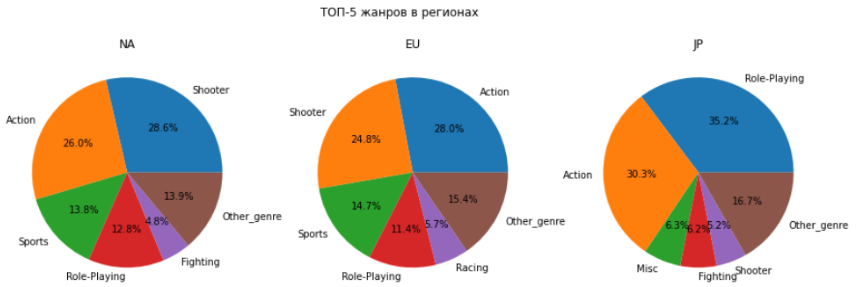

3. Влияние рейтинга ESRB на продажи по регионам:

Влияние рейтинга ESRB на продажи в Северной Америке:
rating
M            96.42
undefined    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64

Влияние рейтинга ESRB на продажи в Европе:
rating
M            93.44
undefined    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64

Влияние рейтинга ESRB на продажи в Японии:
rating
undefined    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64


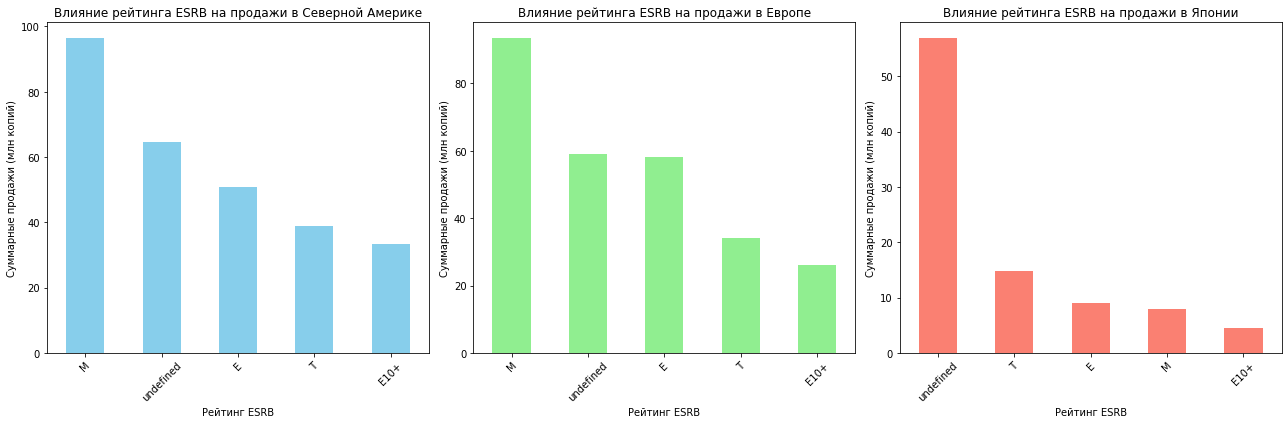

In [41]:
# Группировка данных по рейтингу ESRB и суммарным продажам в каждом регионе
#rating_data = data_after_2014[data_after_2014['rating'] != 'undefined']
#rating_data = data_after_2014

rating_na = data_after_2014.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_eu = data_after_2014.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_jp = data_after_2014.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Выведем результаты
print("Влияние рейтинга ESRB на продажи в Северной Америке:")
print(rating_na)
print("\nВлияние рейтинга ESRB на продажи в Европе:")
print(rating_eu)
print("\nВлияние рейтинга ESRB на продажи в Японии:")
print(rating_jp)

# Построение графиков для влияния рейтинга на продажи
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# График для Северной Америки
rating_na.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Влияние рейтинга ESRB на продажи в Северной Америке')  # Заголовок графика
axes[0].set_xlabel('Рейтинг ESRB')  # Подпись оси X
axes[0].set_ylabel('Суммарные продажи (млн копий)')  # Подпись оси Y
axes[0].tick_params(axis='x', rotation=45)  # Поворот меток на оси X

# График для Европы
rating_eu.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Влияние рейтинга ESRB на продажи в Европе')  # Заголовок графика
axes[1].set_xlabel('Рейтинг ESRB')  # Подпись оси X
axes[1].set_ylabel('Суммарные продажи (млн копий)')  # Подпись оси Y
axes[1].tick_params(axis='x', rotation=45)  # Поворот меток на оси X

# График для Японии
rating_jp.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Влияние рейтинга ESRB на продажи в Японии')  # Заголовок графика
axes[2].set_xlabel('Рейтинг ESRB')  # Подпись оси X
axes[2].set_ylabel('Суммарные продажи (млн копий)')  # Подпись оси Y
axes[2].tick_params(axis='x', rotation=45)  # Поворот меток на оси X

# Корректировка расположения графиков
plt.tight_layout()

# Убедимся, что plt.show() находится в правильном месте
plt.show()

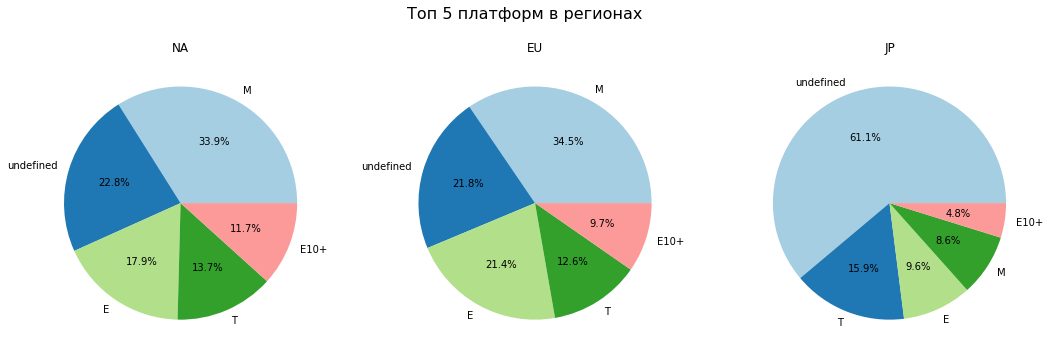

In [42]:
# Настройка графиков для трех круговых диаграмм в одном ряду
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Заголовок для всех графиков
fig.suptitle('Топ 5 платформ в регионах', fontsize=16)

# Северная Америка
axes[0].pie(rating_na, autopct='%1.1f%%', labels=rating_na.index, colors=plt.cm.Paired.colors)
axes[0].set_title('NA')

# Европа
axes[1].pie(rating_eu, autopct='%1.1f%%', labels=rating_eu.index, colors=plt.cm.Paired.colors)
axes[1].set_title('EU')

# Япония
axes[2].pie(rating_jp, autopct='%1.1f%%', labels=rating_jp.index, colors=plt.cm.Paired.colors)
axes[2].set_title('JP')

# Убираем лишние оси
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Учитываем заголовок
plt.show()

На основе обновленных данных с учётом категории игр без рейтинга ESRB ("undefined"), можно сделать следующие выводы о влиянии рейтинга на продажи игр в разных регионах:

 1. Северная Америка (NA):
   -  Рейтинг "M" (Mature)  занимает лидирующую позицию по продажам в Северной Америке с объёмом продаж в 96.42 млн копий. Это свидетельствует о том, что игры для взрослой аудитории продолжают оставаться наиболее популярными.
   -  Игры без рейтинга ESRB ("undefined")  занимают второе место с объёмом продаж 64.72 млн копий, что может указывать на высокий интерес к играм, которые либо не прошли сертификацию в Северной Америке, либо являются релизами из других регионов (например, Японии).
   -  Рейтинг "E" (Everyone) , предназначенный для всех возрастов, на третьем месте с продажами 50.74 млн копий. Это подтверждает высокий спрос на семейные и детские игры.
   - Рейтинги  "T" (Teen)  и  "E10+" (Everyone 10+)  также занимают значительную долю рынка, с продажами 38.95 млн и 33.23 млн копий соответственно, однако их объёмы ниже по сравнению с играми для более взрослой аудитории.

 2. Европа (EU):
   - Как и в Северной Америке,  рейтинг "M" (Mature)  лидирует по объёму продаж — 93.44 млн копий, что подтверждает схожие предпочтения европейских игроков к играм с высоким возрастным ограничением.
   -  Игры без рейтинга ESRB ("undefined")  занимают второе место по объёму продаж — 58.95 млн копий, что может свидетельствовать о большом интересе к играм, выпущенным без сертификации по ESRB.
   -  Рейтинг "E" (Everyone)  демонстрирует схожие результаты с Северной Америкой, занимая третье место с продажами 58.06 млн копий, что подтверждает популярность игр для всех возрастных групп в Европе.
   - Рейтинги  "T" (Teen)  и  "E10+" (Everyone 10+)  также имеют свои позиции на рынке, однако объёмы их продаж составляют 34.07 млн и 26.16 млн копий соответственно, что ниже, чем у рейтингов "M" и "E".

3. Япония (JP):
   - В отличие от Северной Америки и Европы, в Японии наибольшие продажи приходятся на  игры без рейтинга ESRB ("undefined")  — 56.90 млн копий. Это указывает на особенность японского рынка, где многие игры либо не проходят североамериканскую сертификацию, либо выпускаются без неё.
   -  Рейтинг "T" (Teen)  занимает второе место с продажами 14.78 млн копий, что отражает популярность игр для подростковой аудитории в Японии.
   -  Рейтинг "E" (Everyone)  демонстрирует продажи в 8.94 млн копий, что указывает на стабильный спрос на игры для всех возрастов, хотя и уступает играм для подростков.
   - Интересно, что  рейтинг "M" (Mature)  в Японии занимает только четвёртое место с продажами 8.01 млн копий, что контрастирует с результатами Северной Америки и Европы, где данный рейтинг лидирует. Это может отражать культурные особенности и более низкий спрос на игры для взрослой аудитории в Японии.
   -  Рейтинг "E10+"  имеет наименьший объём продаж — 4.46 млн копий, что указывает на его низкую популярность в Японии по сравнению с другими регионами.


Общие выводы:
- В  Северной Америке  и  Европе  игры с рейтингом "M" (для взрослой аудитории) продолжают лидировать по продажам, что указывает на высокую популярность игр для более зрелой аудитории.
- Игры  без рейтинга ESRB ("undefined")  занимают значительную долю продаж во всех регионах, особенно в Японии, что подчёркивает важность релизов, не сертифицированных по ESRB, в мировом игровом рынке. В Японии эта категория занимает первое место, что особенно выделяет её роль на этом рынке.
- В  Японии  же лидером по продажам стали игры без североамериканского рейтинга, что указывает на значительное смещение предпочтений японских игроков в сторону игр, которые не проходят североамериканскую сертификацию.
-  Рейтинги "E" и "T"  показывают стабильные результаты во всех регионах, что говорит о постоянном спросе на семейные и подростковые игры.
-  Рейтинг "E10+" , ориентированный на детей старше 10 лет, продолжает занимать меньшую долю продаж во всех регионах, особенно в Японии.

4. Сравнение долей продаж по платформам:

Доли продаж по платформам в Северной Америке (в процентах):
PS4       34.714497
XOne      28.610153
X360       9.962684
3DS        7.970147
PS3        7.762445
Others    10.980075
dtype: float64

Доли продаж по платформам в Европе (в процентах):
PS4       48.041968
XOne      17.086597
PS3        9.435496
PC         6.638836
3DS        5.955372
Others    12.841732
dtype: float64

Доли продаж по платформам в Японии (в процентах):
3DS       47.523902
PS4       16.134923
PSV       15.619293
PS3       12.052852
WiiU       7.852616
Others     0.816414
dtype: float64


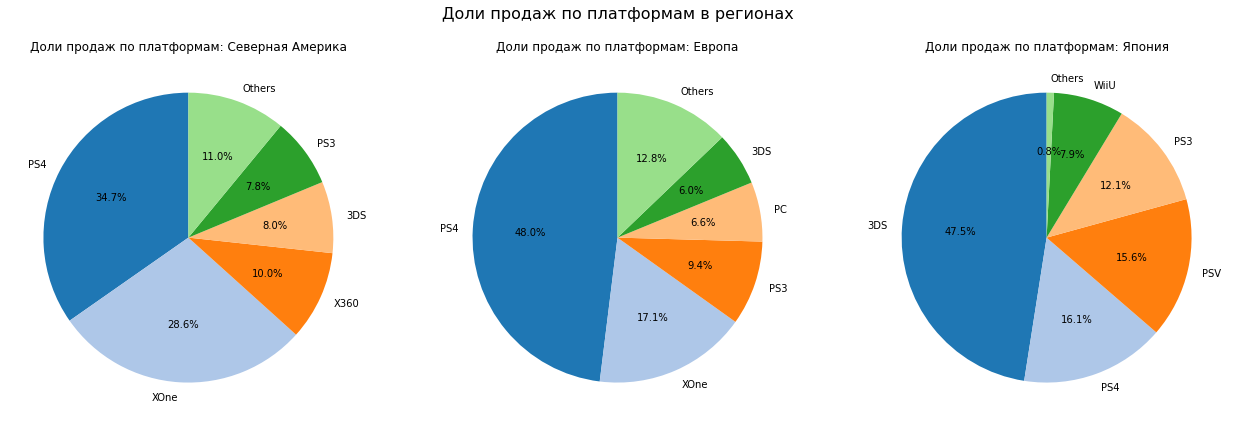

In [43]:
# Процентное соотношение продаж по платформам для каждого региона
platform_share_na = top_platforms_na / top_platforms_na.sum() * 100
platform_share_eu = top_platforms_eu / top_platforms_eu.sum() * 100
platform_share_jp = top_platforms_jp / top_platforms_jp.sum() * 100

# Выведем результаты
print("Доли продаж по платформам в Северной Америке (в процентах):")
print(platform_share_na)
print("\nДоли продаж по платформам в Европе (в процентах):")
print(platform_share_eu)
print("\nДоли продаж по платформам в Японии (в процентах):")
print(platform_share_jp)

# Настройка графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 строка, 3 столбца для графиков

# Заголовок для всех графиков
fig.suptitle('Доли продаж по платформам в регионах', fontsize=16)

# Построение круговой диаграммы для Северной Америки
axes[0].pie(platform_share_na, labels=platform_share_na.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Доли продаж по платформам: Северная Америка')

# Построение круговой диаграммы для Европы
axes[1].pie(platform_share_eu, labels=platform_share_eu.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Доли продаж по платформам: Европа')

# Построение круговой диаграммы для Японии
axes[2].pie(platform_share_jp, labels=platform_share_jp.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Доли продаж по платформам: Япония')

# Убираем лишние оси
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Учитываем заголовок
plt.show()


 Выводы о долях продаж по платформам в разных регионах:

1.  Северная Америка :
   - Наиболее популярной платформой является  X360  (14.82%), за ней следует  PS2  (14.26%) и  Wii  (12.12%).
   - Платформы  PS3  и  DS  также занимают значительные доли (около 9.7% и 9.46% соответственно).
   - Категория  Others  (39.63%) включает множество других платформ, что указывает на высокую диверсификацию рынка.

2.  Европа :
   - Лидирующей платформой является  PS2  (14.21%), за ней идут  PS3  (13.98%) и  X360  (11.46%).
   -  Wii  (11.04%) и  PS  (9.07%) занимают значительные доли.
   - Категория  Others  (40.23%) также указывает на значительную долю продаж, распределенных среди других платформ.

3.  Япония :
   - Наибольшая доля принадлежит  DS  (15.85%), затем идут  PS  (12.66%) и  PS2  (12.46%).
   -  3DS  (9.11%) и  PS3  (7.19%) также важны для рынка.
   - Категория  Others  (42.73%) особенно велика в Японии, что указывает на значительную долю различных других платформ.

5. Сравнение долей продаж по жанрам:

Доли продаж по жанрам в Северной Америке (в процентах):
Shooter         27.818067
Action          25.533338
Sports          16.239527
Role-Playing    11.782722
Misc             5.298176
Others          13.328170
dtype: float64

Доли продаж по жанрам в Европе (в процентах):
Action          27.589774
Shooter         24.205704
Sports          16.894488
Role-Playing    10.407123
Racing           5.220186
Others          15.682725
dtype: float64

Доли продаж по жанрам в Японии (в процентах):
Role-Playing    33.472983
Action          31.775701
Fighting         6.842840
Misc             6.026426
Shooter          5.231496
Others          16.650553
dtype: float64


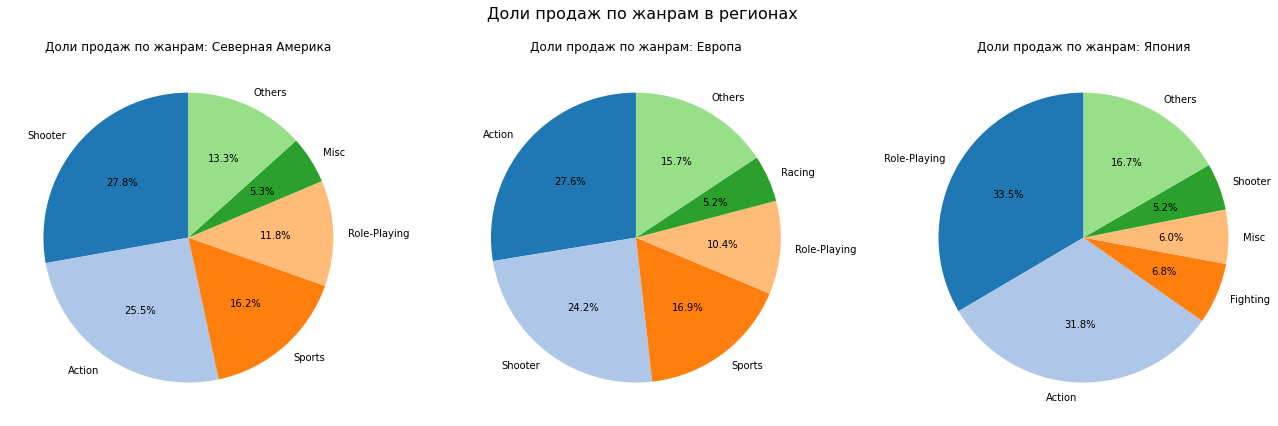

In [44]:
# Процентное соотношение продаж по жанрам для каждого региона
genre_share_na = top_genres_na / top_genres_na.sum() * 100
genre_share_eu = top_genres_eu / top_genres_eu.sum() * 100
genre_share_jp = top_genres_jp / top_genres_jp.sum() * 100

# Выведем результаты
print("Доли продаж по жанрам в Северной Америке (в процентах):")
print(genre_share_na)
print("\nДоли продаж по жанрам в Европе (в процентах):")
print(genre_share_eu)
print("\nДоли продаж по жанрам в Японии (в процентах):")
print(genre_share_jp)

# Настройка графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 строка, 3 столбца для графиков

# Заголовок для всех графиков
fig.suptitle('Доли продаж по жанрам в регионах', fontsize=16)

# Построение круговой диаграммы для Северной Америки
axes[0].pie(genre_share_na, labels=genre_share_na.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Доли продаж по жанрам: Северная Америка')

# Построение круговой диаграммы для Европы
axes[1].pie(genre_share_eu, labels=genre_share_eu.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Доли продаж по жанрам: Европа')

# Построение круговой диаграммы для Японии
axes[2].pie(genre_share_jp, labels=genre_share_jp.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Доли продаж по жанрам: Япония')

# Убираем лишние оси
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Учитываем заголовок
plt.show()


 Выводы о долях продаж по жанрам в разных регионах:

1.  Северная Америка :
   - Наибольшая доля продаж приходится на жанр  Shooter  (27.82%), за ним следует  Action  (25.53%).
   - Жанры  Sports  (16.24%) и  Role-Playing  (11.78%) также имеют значительное влияние.
   -  Misc  (5.30%) и  Others  (13.33%) отражают разнообразие жанров на рынке.

2.  Европа :
   -  Action  (27.59%) является доминирующим жанром, за ним идет  Shooter  (24.21%).
   - Жанры  Sports  (16.89%) и  Role-Playing  (10.41%) также популярны.
   - Жанр  Racing  (5.22%) занимает заметную долю, чего нет в Северной Америке, а категория  Others  составляет 15.68%.

3.  Япония :
   -  Role-Playing  (33.47%) и  Action  (31.78%) составляют подавляющую долю продаж в Японии, что отражает любовь к ролевым играм и экшену.
   -  Fighting  (6.84%) занимает третье место, что отличает японский рынок от других регионов.
   - Жанры  Misc  (6.03%) и  Shooter  (5.23%) занимают меньшую, но всё ещё важную долю, а категория  Others  составляет 16.65%.

Общие выводы:
-  Северная Америка  и  Европа  демонстрируют схожие предпочтения как по жанрам (доминируют экшен и шутеры), так и по платформам (лидерство PS2 и X360).
-  Япония  заметно отличается по жанрам, с явным предпочтением  Role-Playing  игр и меньшей популярностью шутеров.
- На японском рынке платформы  DS ,  PS , и  PS2  остаются лидерами, что также отражает уникальные предпочтения по сравнению с западными рынками.




 Портрет пользователя по регионам:

 1.  Северная Америка :
-  Жанровые предпочтения : Игроки в Северной Америке предпочитают  Shooter  и  Action  игры, что говорит о любви к динамичным и интенсивным игровым процессам.
-  Платформы : Лидером является  Xbox 360 , что свидетельствует о большой популярности консолей от  Microsoft  на этом рынке.
-  Возрастная категория : Поскольку ведущий рейтинг —  M (Mature) , основной аудиторией являются взрослые игроки, ориентированные на экшн, шутеры и спортивные симуляторы.

 2.  Европа :
-  Жанровые предпочтения : Как и в Северной Америке, в Европе популярны  Action  и  Shooter  игры, что свидетельствует о схожем вкусе в динамичных жанрах.
-  Платформы : Лидером является  PlayStation 2 , что говорит о сильных позициях  Sony . Также высоко ценятся консоли  PlayStation 3  и  Xbox 360 .
-  Возрастная категория : Основная аудитория также состоит из взрослых игроков, так как лидирует рейтинг  M (Mature) . Но присутствует и значительная доля семейных и подростковых игр.

 3.  Япония :
-  Жанровые предпочтения : В Японии преобладают игры жанра  Role-Playing , что отражает склонность японских игроков к погружению в миры с проработанными сюжетами и персонажами. Также популярны  Action  и  Fighting .
-  Платформы : Японский рынок сильно ориентирован на  портативные устройства , с лидерами в лице  Nintendo DS  и  3DS . Также популярны консоли от  Sony , особенно  PlayStation .
-  Возрастная категория : Основная аудитория — подростки и молодые взрослые, так как самым популярным рейтингом является  T (Teen) , что отражает интерес к играм, рассчитанным на подростковую аудиторию.


 Общие выводы:

В Северной Америке и Европе лидируют жанры **Action** и **Shooter**, которые пользуются наибольшей популярностью среди игроков. Игры с рейтингом **M (Mature)**, предназначенные для взрослой аудитории, занимают значительную долю продаж в обоих регионах. Платформы **Xbox 360**, **PS2** и **PS3** доминируют на рынках Северной Америки и Европы, что указывает на высокую популярность домашних консолей от **Microsoft** и **Sony**. В этих регионах также наблюдается устойчивый интерес к спортивным и ролевым играм.

Японский рынок значительно отличается от западных. Здесь доминируют **Role-Playing** игры, которые занимают более третьей части всех продаж. Это говорит о предпочтении японских игроков к более сюжетным и стратегическим играм. Платформы **Nintendo DS** и **3DS** занимают лидирующие позиции, что отражает популярность портативных консолей. В Японии также отмечается высокий спрос на игры с рейтингом **T (Teen)**, ориентированные на подростков, в отличие от Северной Америки и Европы, где преобладают игры для взрослой аудитории.

Таким образом, западные и восточные рынки демонстрируют значительные различия как в жанровых предпочтениях, так и в выборе платформ.



#### Промежуточный вывод по портрету пользователя каждого региона


 Платформенные предпочтения:

1.  Северная Америка (NA): 
   -  PlayStation 4  (98.61 млн копий) и  Xbox One  (81.27 млн копий) доминируют, подтверждая предпочтение домашних консолей в этом регионе. Несмотря на возраст,  Xbox 360  (28.30 млн) сохраняет популярность, что указывает на лояльность к бренду Microsoft. Портативные консоли, такие как  Nintendo 3DS , также находят свою аудиторию (22.64 млн копий).
   
2.  Европа (EU): 
   -  PlayStation 4  (130.04 млн копий) — абсолютный лидер на европейском рынке. Интересно отметить, что  Xbox One  (46.25 млн) здесь продаётся значительно хуже, чем в Северной Америке. Важную роль в Европе также играют компьютерные игры, о чем свидетельствуют высокие продажи на  PC  (17.97 млн).
   
3.  Япония (JP): 
   - Японский рынок продолжает демонстрировать уникальные предпочтения с явным доминированием портативных консолей, таких как  Nintendo 3DS  (44.24 млн копий).  PlayStation Vita  (14.54 млн) остаётся популярной только в Японии.  PlayStation 4  (15.02 млн) имеет относительно меньший успех по сравнению с портативными платформами.

 Жанровые предпочтения:

-  Северная Америка и Европа  демонстрируют схожие предпочтения к динамичным жанрам, таким как  Action  и  Shooter , подтверждая интерес к интенсивным игровым процессам.  Спортивные игры  также остаются популярными в этих регионах.
-  Япония  отличается сильной ориентацией на  RPG  (Role-Playing), что подтверждается высокими продажами в этом жанре. Меньший интерес к шутерам и спортивным играм, по сравнению с западными рынками, указывает на культурные различия в геймерских предпочтениях.

 Рейтинговые предпочтения (ESRB):

- В  Северной Америке  и  Европе  взрослые игроки составляют основную аудиторию, что видно по доминированию игр с рейтингом  "M" (Mature) . Это свидетельствует о популярности более сложных и серьезных игровых тем.
- В  Японии , напротив, игры с рейтингом  "T" (Teen)  более популярны, что говорит о значительной доле молодежной аудитории.

Общие выводы:

1.  Доминирование платформ: 
   -  PlayStation 4  является самой популярной платформой во всех регионах, особенно в Европе, где её доля рынка наиболее высока.
   -  Nintendo 3DS  также демонстрирует высокие продажи по всему миру, особенно в Японии, подтверждая успех портативных устройств.
   -  Xbox One  имеет сильные позиции в Северной Америке, но в Европе и Японии её популярность заметно ниже.

2.  Различие в предпочтениях: 
   - В  Северной Америке  и  Европе  лидируют домашние консоли и динамичные игры, такие как  Action  и  Shooter .
   - В  Японии  наблюдается явная предрасположенность к портативным консолям и сюжетным RPG, что отражает специфику местной игровой культуры.

3.  Разнообразие платформ: 
   - Хотя лидеры рынка заметны, продажи в категории  "Others"  указывают на разнообразие предпочтений игроков, особенно в Европе и Северной Америке, где большое количество платформ продолжает находить свою аудиторию.

Таким образом, данные показывают значительные региональные различия в предпочтениях пользователей, отражающие культурные и рыночные особенности каждого региона.

### Шаг 5. Проверим гипотезы

1. Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

1. Формулировка нулевой и альтернативной гипотезы

- **Нулевая гипотеза (H0)**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. (μ₁ = μ₂)
  
- **Альтернативная гипотеза (H1)**: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые. (μ₁ ≠ μ₂)

2. Критерий для проверки гипотезы

Для проверки гипотезы мы применим **t-критерий Стьюдента для независимых выборок** (t-test). Этот критерий используется в следующих случаях:

- **Сравнение средних**: Мы хотим определить, есть ли статистически значимая разница между средними значениями двух независимых групп (в данном случае, пользовательские рейтинги платформ Xbox One и PC).

- **Нормальность данных**: t-тест предполагает, что данные в обеих группах имеют нормальное распределение, что в большинстве случаев можно считать приемлемым для анализа.

- **Независимость выборок**: Рейтинги пользователей для Xbox One и PC представляют собой независимые выборки, что соответствует условиям применения t-теста.


In [45]:
#XOne_data = data_after_2014[data_after_2014['platform'] == 'XOne']
pc_data = data_after_2014[data_after_2014['platform'] == 'PC']
XOne_data = XOne_data[~XOne_data['user_score'].isna()]
pc_data = pc_data[~pc_data['user_score'].isna()]

alpha = 0.05
result = st.ttest_ind(XOne_data['user_score'],pc_data['user_score'])
print('Средний рейтинг платформы Xbox One:',XOne_data['user_score'].mean())
print('Средний рейтинг платформы ЗС:',pc_data['user_score'].mean())
print(f'p-value: {result.pvalue}') 

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print('Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    print('Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

Средний рейтинг платформы Xbox One: 6.594545454545456
Средний рейтинг платформы ЗС: 6.298360655737705
p-value: 0.10450507919348415
Не удалось отвергнуть нулевую гипотезу
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


В ходе проверки гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, был применен t-критерий Стьюдента для независимых выборок. Нулевая гипотеза (H0) утверждала, что средние пользовательские рейтинги этих платформ равны, в то время как альтернативная гипотеза (H1) предполагала их различие.

Результаты тестирования показали p-value ≈ 0.1045, что выше установленного уровня значимости (α = 0.05). Это позволило нам не отвергать нулевую гипотезу и заключить, что средние пользовательские рейтинги платформ Xbox One и PC действительно статистически одинаковые. Это свидетельствует о том, что пользователи равноценно оценивают игры на этих платформах. В подтверждение этому отметим схожие средние оценки на платформах Xbox One и PC: 6,59 и 6,3 соответственно.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Формулировка нулевой и альтернативной гипотезы

1. Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые. (μ₁ = μ₂)

2. Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ жанров Action и Sports не одинаковые. (μ₁ ≠ μ₂)

Критерий для проверки гипотезы
- Для проверки гипотезы мы применим t-критерий Стьюдента для независимых выборок (t-test). Этот критерий используется в следующих случаях:
- Сравнение средних: Мы хотим определить, есть ли статистически значимая разница между средними значениями двух независимых групп (в данном случае, пользовательские рейтинги жанров Action и Sports).
- Нормальность данных: t-тест предполагает, что данные в обеих группах имеют нормальное распределение, что в большинстве случаев можно считать приемлемым для анализа.
- Независимость выборок: Рейтинги пользователей для жанров Action и Sports представляют собой независимые выборки, что соответствует условиям применения t-теста.

In [46]:
action_data = data_after_2014[data_after_2014['genre'] == 'Action']
sports_data = data_after_2014[data_after_2014['genre'] == 'Sports']

action_data = action_data[~action_data['user_score'].isna()]
sports_data = sports_data[~sports_data['user_score'].isna()]

alpha = 0.05
result = st.ttest_ind(action_data['user_score'],sports_data['user_score'])

print(f'p-value: {result.pvalue:.2e}') 
print('Средний рейтинг жанра Action:',action_data['user_score'].mean())
print('Средний рейтинг жанра Sports:',sports_data['user_score'].mean())

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print('Средние пользовательские рейтинги жанров Action и Sports не одинаковые')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    print('Средние пользовательские рейтинги жанров Action и Sports одинаковые')

p-value: 2.87e-19
Средний рейтинг жанра Action: 6.760606060606061
Средний рейтинг жанра Sports: 5.2251968503937
Отвергаем нулевую гипотезу
Средние пользовательские рейтинги жанров Action и Sports не одинаковые


Также была проверена гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports. Для этого снова был использован t-критерий. Нулевая гипотеза утверждала, что рейтинги этих жанров одинаковые, а альтернативная — что они различаются. Полученное p-value ≈ 2.87e-19 было значительно ниже уровня значимости (α = 0.05), что послужило причиной отвергнуть нулевую гипотезу. Это указывает на то, что средние пользовательские рейтинги жанров Action и Sports статистически различаются. В подтверждение этому служат средние оценки 6,76 и 5,22 для жанра Action и Sports соответственно.

Таким образом, результаты проверки гипотез подтвердили, что пользовательские рейтинги игр на разных платформах одинаковые, в то время как разница в оценках между жанрами статичтически значимая. Это может указывать на влияние особенностей конкретного жанра на пользовательские оценки, в то время как платформа, вероятно, не оказывает столь значительного влияния на оценки пользователей.

#### Промежуточные выводы

Общий вывод по проверке гипотез

В ходе исследования были проверены две гипотезы, касающиеся средних пользовательских рейтингов игр на платформах Xbox One и PC, а также жанров Action и Sports.

1. Проверка гипотезы о средних пользовательских рейтингах платформ Xbox One и PC

-  Нулевая гипотеза (H0) : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (μ₁ = μ₂).
-  Альтернативная гипотеза (H1) : Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые (μ₁ ≠ μ₂).

Результаты анализа показали следующие значения:
- Средний рейтинг платформы Xbox One: 6.59
- Средний рейтинг платформы PC: 6.30
- p-value: 0.1045

Так как p-value выше установленного уровня значимости (α = 0.05), мы не можем отвергнуть нулевую гипотезу. Это позволяет заключить, что средние пользовательские рейтинги платформ Xbox One и PC статистически одинаковые. Рейтинги этих платформ пользователи оценивают почти равноценно.

2. Проверка гипотезы о средних пользовательских рейтингах жанров Action и Sports

-  Нулевая гипотеза (H0) : Средние пользовательские рейтинги жанров Action и Sports одинаковые (μ₁ = μ₂).
-  Альтернативная гипотеза (H1) : Средние пользовательские рейтинги жанров Action и Sports не одинаковые (μ₁ ≠ μ₂).

Результаты тестирования показали:
- Средний рейтинг жанра Action: 6.76
- Средний рейтинг жанра Sports: 5.22
- p-value: 2.87e-19

Полученное значение p-value значительно ниже уровня значимости (α = 0.05), что позволяет отвергнуть нулевую гипотезу. Это указывает на то, что средние пользовательские рейтинги жанров Action и Sports статистически различаются. 

Заключение

Таким образом, результаты проверки гипотез подтвердили, что:
- Пользовательские рейтинги игр на платформах Xbox One и PC являются одинаковыми.
- Существует статистически значимая разница в оценках между жанрами Action и Sports.

Эти результаты могут указывать на влияние жанровых особенностей на пользовательские оценки, в то время как платформа не оказывает столь значительного влияния на эти оценки. 

### Общий вывод

Целью исследования было выявление ключевых факторов, влияющих на успешность игр, чтобы оптимизировать рекламные стратегии интернет-магазина «Стримчик». Проанализированы данные о продажах игр на различных платформах, предпочтениях пользователей по регионам, а также влиянии оценок критиков и пользователей на продажи.

1. Изучение и подготовка данных:  В процессе предобработки данных заменили названия столбцов на нижний регистр для упрощения работы. Пропуски в годах выпуска (269 записей) были удалены, так как их количество было незначительным. В столбце оценок критиков было пропущено 8578 значений (51,46%), которые были оставлены для дальнейшего анализа. В столбце пользовательских оценок значения 'tbd' были заменены на NaN, а пропуски остались без изменений. Также пропуски в рейтингах (5766 записей) были заменены на заглушку ('undefined') для дальнейшего анализа. В итоге пропуски были обработаны, и суммарные продажи во всех регионах были записаны в отдельный столбец.

2. Тенденции по платформам:  Жизненный цикл платформ составляет примерно 6 лет. Платформы начинают набирать популярность в течение нескольких лет после выхода, достигают пика продаж и затем продажи начинают снижаться с появлением новых поколений консолей. Исторические лидеры продаж -  PS2 (медиана 1233.56 млн копий) и Wii (80 млн копий), однако PS4 и Xbox One показывают стабильные результаты с медианами около 70 и 30 млн соответственно, что указывает на стабильные результаты и возможность роста.

3. Анализ жанров:  Жанр Action   лидирует с общими продажами более 1500 млн копий, Sports и Shooter следуют за ним с 1150 млн и 920 млн копий соответственно. Ролевые игры (RPG) продолжают занимать значительное место в Японии, в то время как в Северной Америке и Европе доминируют Action и Sports.

4. Портреты пользователей по регионам: 

   - Северная Америка :

     - Наибольшая доля продаж приходится на жанр Shooter (27.82%), за ним следует Action (25.53%).
     - Жанры Sports (16.24%) и Role-Playing (11.78%) также имеют значительное влияние. 
     - Misc (5.30%) и Others (13.33%) отражают разнообразие жанров на рынке.
     
   - Европа :

     - Action (27.59%) является доминирующим жанром, за ним идет Shooter (24.21%).
     - Жанры Sports (16.89%) и Role-Playing (10.41%) также популярны.
     - Жанр Racing (5.22%) занимает заметную долю, чего нет в Северной Америке, а категория Others составляет 15.68%.

   - Япония :

     - Role-Playing (33.47%) и Action (31.78%) составляют подавляющую долю продаж в Японии, что отражает любовь к ролевым играм и экшену.
     - Fighting (6.84%) занимает третье место, что отличает японский рынок от других регионов. 
     - Жанры Misc (6.03%) и Shooter (5.23%) занимают меньшую, но всё ещё важную долю, а категория Others составляет 16.65%.

 
В Северной Америке и Европе лидируют жанры Action и Shooter, которые пользуются наибольшей популярностью среди игроков. Игры с рейтингом M (Mature), предназначенные для взрослой аудитории, занимают значительную долю продаж в обоих регионах. Платформы Xbox 360, PS2 и PS3 доминируют на рынках Северной Америки и Европы, что указывает на высокую популярность домашних консолей от Microsoft и Sony. В этих регионах также наблюдается устойчивый интерес к спортивным и ролевым играм.

Японский рынок значительно отличается от западных. Здесь доминируют Role-Playing игры, которые занимают более третьей части всех продаж. Это говорит о предпочтении японских игроков к более сюжетным и стратегическим играм. Платформы Nintendo DS и 3DS занимают лидирующие позиции, что отражает популярность портативных консолей. В Японии также отмечается высокий спрос на игры с рейтингом T (Teen), ориентированные на подростков, в отличие от Северной Америки и Европы, где преобладают игры для взрослой аудитории.

Несмотря на доминирование нескольких крупных платформ, категория  "Others"  показывает наличие разнообразия на рынках, особенно в Европе и Северной Америке, что свидетельствует о разнообразных предпочтениях игроков.
Таким образом, западные и восточные рынки демонстрируют значительные различия как в жанровых предпочтениях, так и в выборе платформ.
-  Северная Америка  демонстрирует явное доминирование  PlayStation 4  и  Xbox One , что подчёркивает популярность домашних консолей в этом регионе. Несмотря на возраст,  Xbox 360  продолжает оставаться в топе.
- В  Европе  также доминирует  PlayStation 4 , но значительно ниже по продажам  Xbox One  по сравнению с Северной Америкой. Примечательно также сильное присутствие  PC  в пятёрке лидеров.
- В  Японии  явно выражено предпочтение портативным консолям, с лидером  Nintendo 3DS  и высокой популярностью  PlayStation Vita , что отличает японский рынок от западных.
-  PlayStation 4  является лидером продаж во всех трёх регионах, но демонстрирует особенно сильные позиции в Европе.
-  Nintendo 3DS  занимает лидирующие позиции в Японии и находится в пятёрке лучших платформ в Северной Америке и Европе, что говорит о популярности портативных консолей от Nintendo по всему миру.
- Несмотря на доминирование нескольких крупных платформ, категория  "Others"  показывает наличие разнообразия на рынках, особенно в Европе и Северной Америке, что свидетельствует о разнообразных предпочтениях игроков.

- PS4 и XOne демонстрируют стабильные медианные продажи (0,185 млн и 0,205 млн копий соответственно), что свидетельствует о том, что на этих платформах средний уровень продаж выше, чем на многих других платформах.
- WiiU также показывает сравнительно высокую медиану (0,190 млн копий), что говорит о стабильных продажах, несмотря на относительно низкую популярность.
- Платформы предыдущего поколения (Wii и X360) сохраняют медианные продажи на уровне 0,180 млн копий, что показывает, что они остаются востребованными у определённых аудиторий, хотя их популярность снижается.
- 3DS демонстрирует медиану в 0,090 млн копий, что ниже по сравнению с крупными консолями, но платформа всё ещё способна выпускать игры, которые могут стать большими хитами.
- PC (0,060 млн копий) и портативные устройства, такие как PSV (0,040 млн копий) и PSP (0,020 млн копий), имеют значительно меньшие медианные продажи, что делает их менее привлекательными для массовых проектов.


5. Влияние оценок:  Корреляция между оценками критиков и продажами остается значимой: для X360 она составила 0,53, что подтверждает важность рецензий. Оценки пользователей   имеют слабое влияние на продажи; для Xbox One корреляция была около -0,07.

6. Результаты проверки гипотез подтвердили, что пользовательские рейтинги игр на платформах Xbox One и PC статистически одинаковы, в то время как разница в оценках между жанрами Action и Sports была статистически значимой.

Рекомендации:

1.  Рекомендации по платформам:

-  XOne  и  PS4  — это основные платформы, на которые Стримчику стоит обратить внимание, так как они демонстрируют не только крупные выбросы в продажах, но и стабильность через высокие медианные значения.
- Платформы  Wii ,  X360  и  WiiU  также показывают достойные медианные продажи, что может свидетельствовать о существующем потенциале для игр на них.
-  3DS  — это особый случай, где медиана невелика, но есть игры с исключительными продажами, что делает её интересной для нишевых игр или жанров.
-  PC  и портативные устройства значительно отстают по медиане, что делает их менее приоритетными для крупных проектов, ориентированных на массовую аудиторию.

Таким образом, стратегия Стримчика должна строиться на приоритете для  XOne ,  PS4  и, возможно,  3DS , в зависимости от аудитории и характера игр. PS4 и Xbox One остаются перспективными для продвижения, с медианой продаж около 70 и 30 млн копий соответственно. Следует также рассмотреть возможность переиздания популярных игр для более старых платформ, таких как PS2 и Wii, с учетом их значительных продаж.

2.  Фокус на рецензии критиков:  Положительные оценки критиков оказывают значительное влияние на продажи, поэтому стоит уделять внимание продвижению игр через обзоры и рецензии. Эффективные PR-кампании и предварительное тестирование игр могут способствовать получению высоких оценок.

3.  Региональные различия:  В Северной Америке и Европе популярны шутеры и спортивные игры, а в Японии доминируют ролевые игры и портативные консоли. Рекомендации по продвижению игр должны учитывать эти региональные предпочтения для максимизации прибыли. Например, в Северной Америке можно организовать турниры по шутерам, а в Японии — рекламные кампании, нацеленные на RPG.

4.  Адаптация контента:  Учитывая, что пользовательские оценки не оказывают значительного влияния на продажи, рекомендуется сосредоточиться на создании контента, который будет привлекателен для целевой аудитории, а также на активном взаимодействии с сообществом игроков для получения обратной связи.

5.  Мониторинг трендов:  Необходимо постоянно следить за изменениями в предпочтениях игроков и трендах на игровом рынке, чтобы оперативно адаптировать стратегии продвижения и разработки игр, что поможет увеличить продажи в 2017 году и далее.
